#  <span style="color:red"> <p style="text-align:center"> Teaching Assistance </p></span>


Made By  : **Archita Agrawal**

- **Team ID:**    PTID-CDS-SEP-22-1372
- **Project Id:** PRCP-1026-Teaching Assistance

# Overview

The data consist of evaluations of teaching performance over three regular semesters and two summer semesters of 151 teaching assistant (TA) assignments at the Statistics Department of the University of Wisconsin-Madison. The scores were divided into 3 roughly equal-sized categories ("low", "medium", and "high") to form the class variable.

## **Business Case** : 

### Predicting Teacher Performance score on 3 equal-sized categories("low", "medium", and "high") i.e class variable

Using Machine Learning and various data science libraries we build a model that classify the data points into given labels. We will use the following pipeline to create a reliable model:

- Problem Definition
- Data 
- Explorartory Data Analysis
- Data Preprocessing
- Feature Selection
- Model Selection
- HyperParameter Tunning
- Model Evaluation
- Feature Importance

## Problem Definition

Goal is to predict Teacher Performance. Specifically, we have to be predicting three probabilities: 
- Low
- Medium
- High

## Data
The Data provided by Datamites:

https://mail.google.com/mail/u/0?ui=2&ik=2884cd0e27&attid=0.1&permmsgid=msg-f:1744469809778745598&th=18359a0ca54160fe&view=att&disp=safe&realattid=f_l89tu2oo0

Using both Training and Testing Data.

## Attribute Information

We provided with  6 Attributes information , no column name  is given in the dataset , description of attribute are given below:

- 1. Whether of not the TA is a native English speaker (binary); 1=English speaker, 2=non-English speaker
- 2. Course instructor (categorical, 25 categories)
- 3. Course (categorical, 26 categories)
- 4. Summer or regular semester (binary) 1=Summer, 2=Regular
- 5. Class size (numerical)
- 6. Class attribute (categorical) 1=Low, 2=Medium, 3=High


### Setting Up the tools

In [1]:
# All the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv


from scipy import stats

%matplotlib inline 

# Get rid of all the warnings
import warnings 
warnings.filterwarnings('ignore')

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import metrics
from sklearn.linear_model import RidgeClassifier


#For Balancing the data Improting imblearn
from imblearn.over_sampling import SMOTE

# To convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# importing counter to check count of each label
from collections import Counter

# Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,f1_score

#stratified sampling instead of random sampling using Stratified Kfold
from sklearn.model_selection import StratifiedKFold

### DataSet

In [2]:
# Loading data from table and header is not mention in the table ,So specifying header=None 
data_of_teacher_assist=pd.read_csv(r"tae.csv",header=None)

<h4 style=color:green>Data got loaded and save into data_of_teacher_assist variable</h3>

In [3]:
# Retriving data
data_of_teacher_assist

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


<h4 style=color:green>Data retrived as its showing 151 rows and 6 column is there with no header name</h4>

In [4]:
# Showing First 10 rows from dataset
data_of_teacher_assist.head(10)

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
5,2,23,3,1,20,3
6,2,9,5,2,19,3
7,2,10,3,2,27,3
8,1,22,3,1,58,3
9,2,15,3,1,20,3


<h4 style=color:green>From starting 10 rows are shown above</h3>

In [5]:
# Showing last 10 rows from dataset
data_of_teacher_assist.tail(10)

,0,1,2,3,4,5
141,2,17,18,2,29,1
142,2,16,20,2,15,1
143,2,3,2,2,37,1
144,2,19,4,2,10,1
145,2,23,3,2,24,1
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1
150,2,2,10,2,27,1


<h4 style=color:green>Last 10 rows are shown above</h3>

In [6]:
# Displaying information of the dataset ie. column name,datatype,no of rows and how many int,float,str etc
data_of_teacher_assist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       151 non-null    int64
 1   1       151 non-null    int64
 2   2       151 non-null    int64
 3   3       151 non-null    int64
 4   4       151 non-null    int64
 5   5       151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


<h4 style=color:green>Total 151 rows are there and all the column are having int type of data</h3>

### Renaming the column of the given dataset
- 0 : 'English Speaker'
- 1 : 'Course Instructor'
- 2: 'Course'
- 3: 'Type_of_Semester'
- 4: 'Class_Size'
- 5: 'Class_Attribute'

In [7]:
# As column name is not mentioned in the table ,so giving speicific column name to all the column to the given dataset
data_of_teacher_assist.rename(columns={0:'English_Speaker',1:'Course_Instructor',2:'Course',3:'Type_of_Semester',4:'Class_Size',5:'Class_Attribute'},inplace=True)

<h4 style=color:green>Renaming of the column is done with rename method</h3>

In [8]:
#checking the Coloumn with new column name in the dataset
data_of_teacher_assist.head(10)

,English_Speaker,Course_Instructor,Course,Type_of_Semester,Class_Size,Class_Attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
5,2,23,3,1,20,3
6,2,9,5,2,19,3
7,2,10,3,2,27,3
8,1,22,3,1,58,3
9,2,15,3,1,20,3


<h4 style=color:green>Again checking first 10 rows with specified column name</h3>

In [9]:
# Checking descrption of the column like, min,max,std,count
data_of_teacher_assist.describe()

,English_Speaker,Course_Instructor,Course,Type_of_Semester,Class_Size,Class_Attribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


<h4 style=color:green>As data is of numerical type so checked the count,mean,std,min,max,25%,50% and 75 percentile .No,value is 0 </h3>

In [10]:
# Checking null value is present on dataset or not
data_of_teacher_assist.isnull()

,English_Speaker,Course_Instructor,Course,Type_of_Semester,Class_Size,Class_Attribute
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False
149,False,False,False,False,False,False


<h4 style=color:green>As all column showing False,seems no null value is present.</h3>

In [11]:
# Checking how many null value is present in specific column in the dataset
data_of_teacher_assist.isnull().sum()

English_Speaker      0
Course_Instructor    0
Course               0
Type_of_Semester     0
Class_Size           0
Class_Attribute      0
dtype: int64

<h4 style=color:green>No Null value present in dataset</h3>

### <span style="color:Green">Observation from Basic Checks : </span>

- Very Small dataset only 151 rows and 6 columns are there in this project.
- Target Variable is Classified in three Probabilties i.e low,medium,high.
- All the data is integer type of only.
- Seems English Speaker,Type of Semester and Class Attribute is of Categorical type of data in nature.
- Course,Course Instructor is categorcial but too many categories.
- Class Size is numerical in nature.
- No null value is present in the dataset.

## Explorartory Data Analysis

We will perform three types of Analysis :

1. Univariate Analysis <br>
2. Bivariate Analysis <br>
3. Multivariate Analysis

### 1.Univariate Analysis

                                             |                                             | [  0%]   00:00 ->…


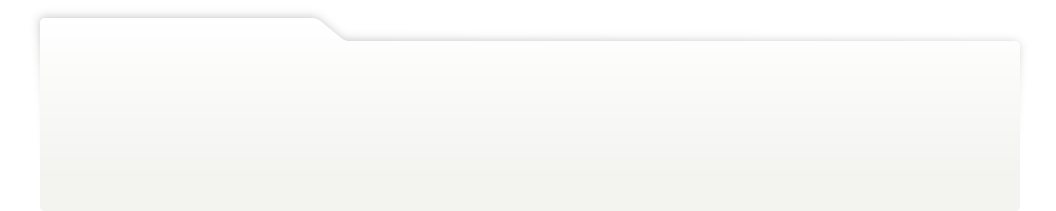
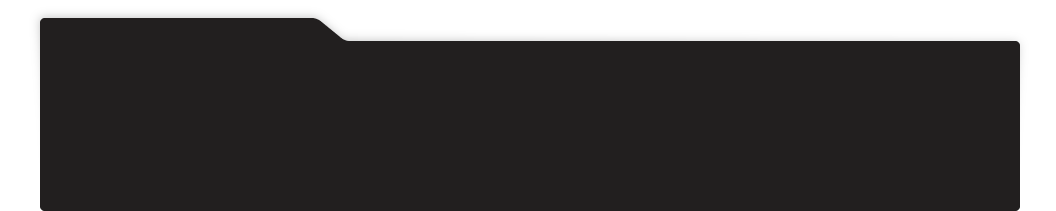
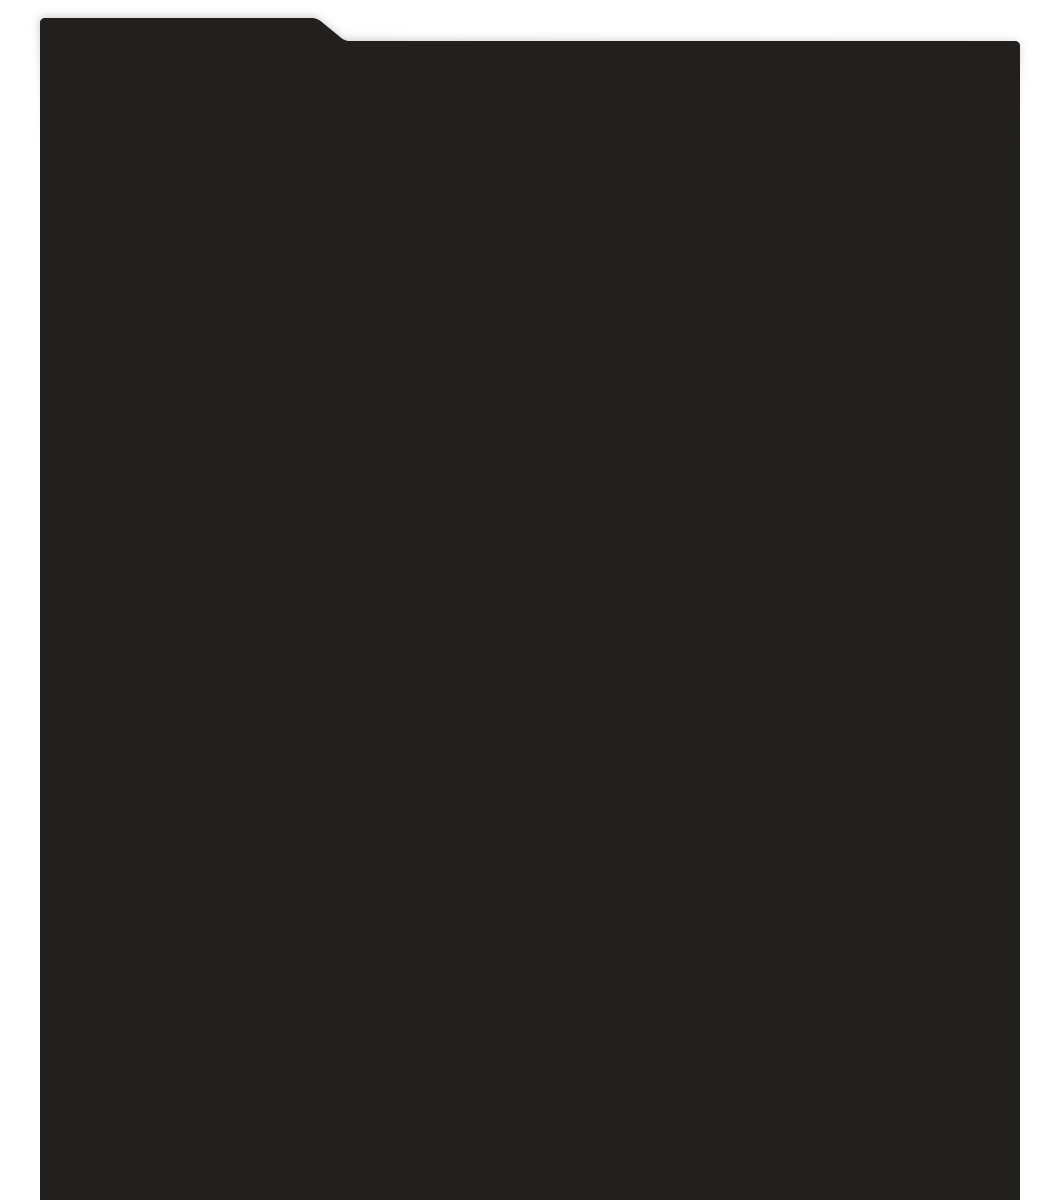
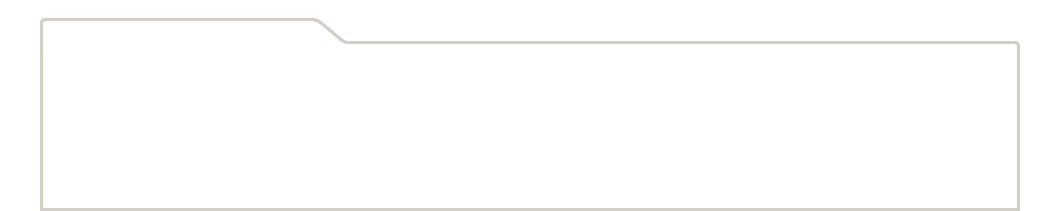
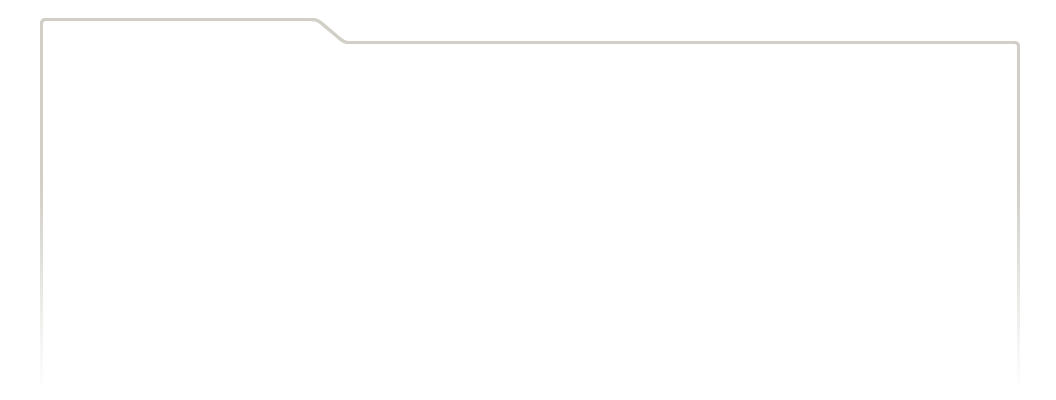
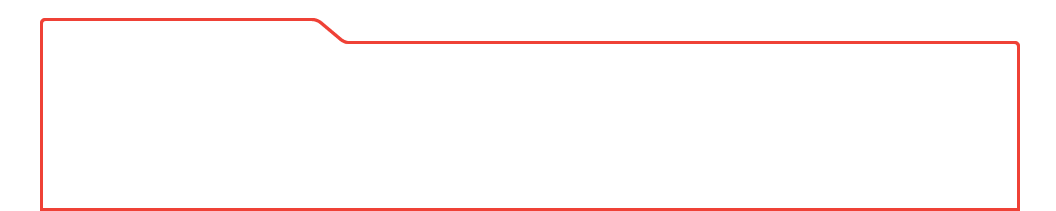
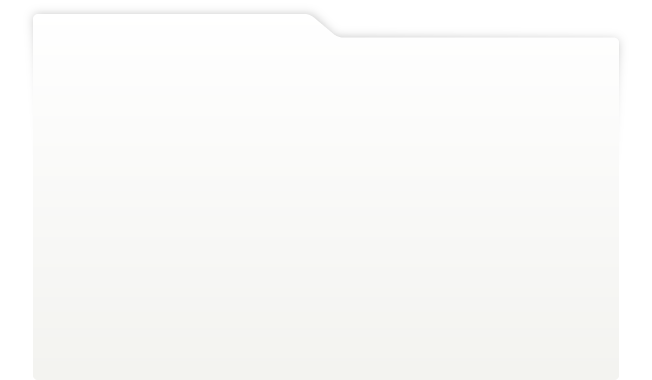
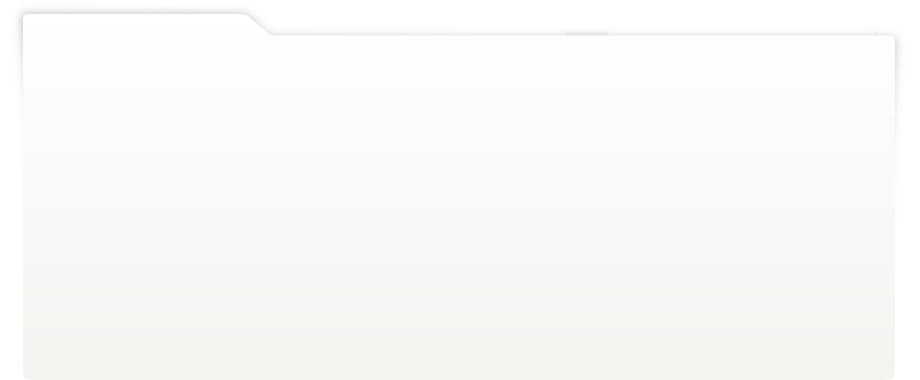
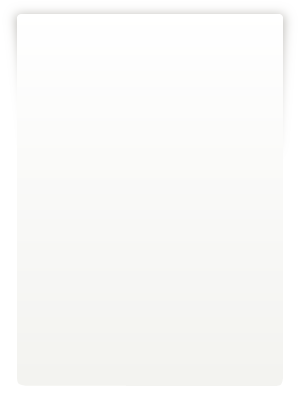
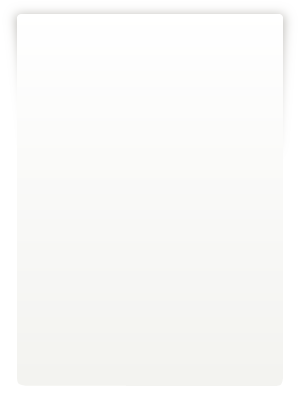
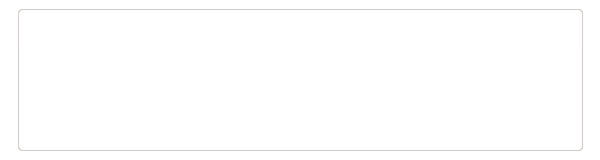
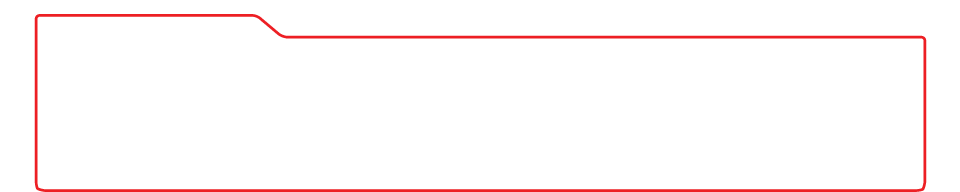
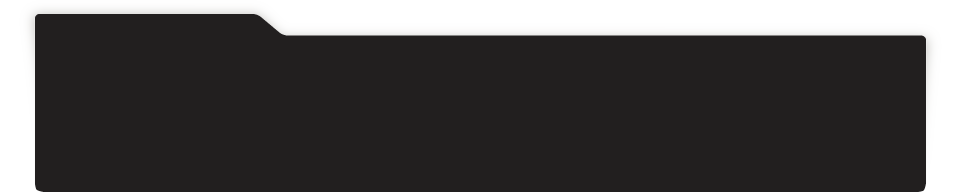
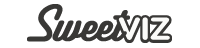
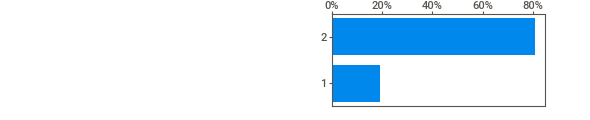
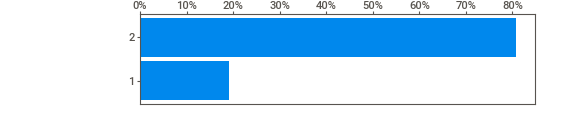
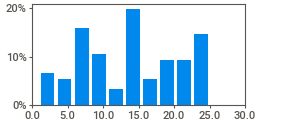
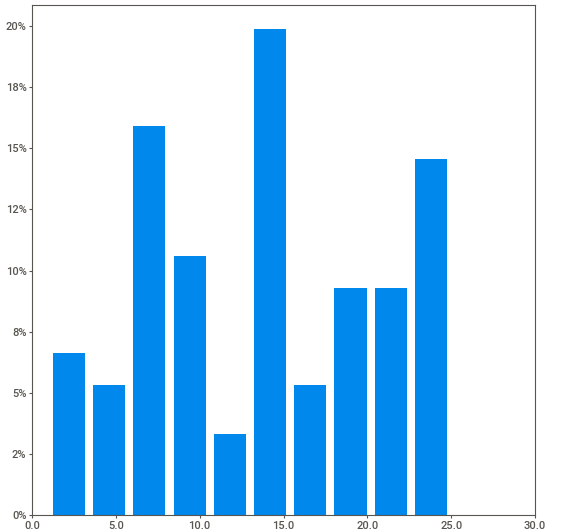
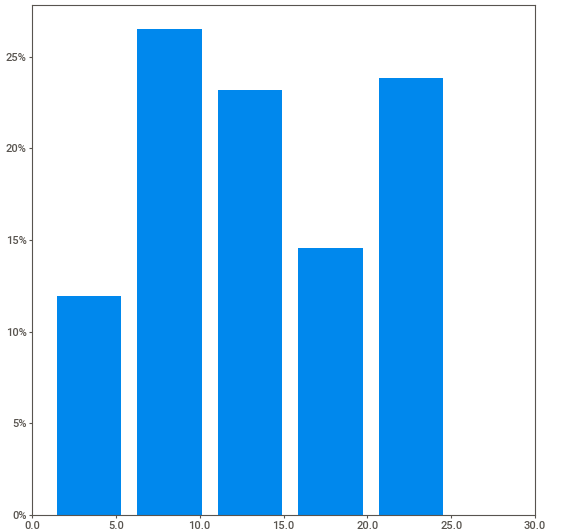
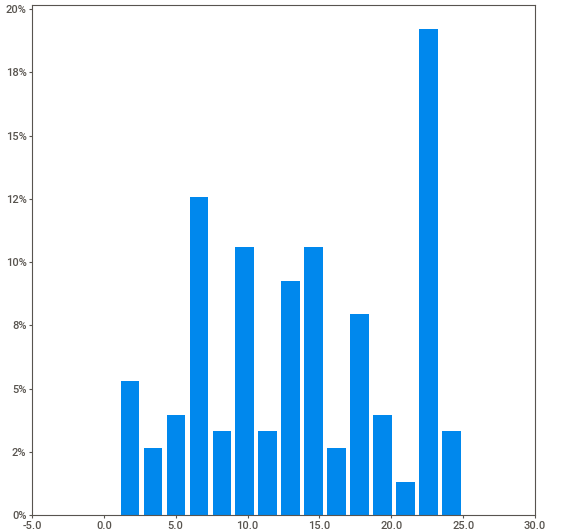
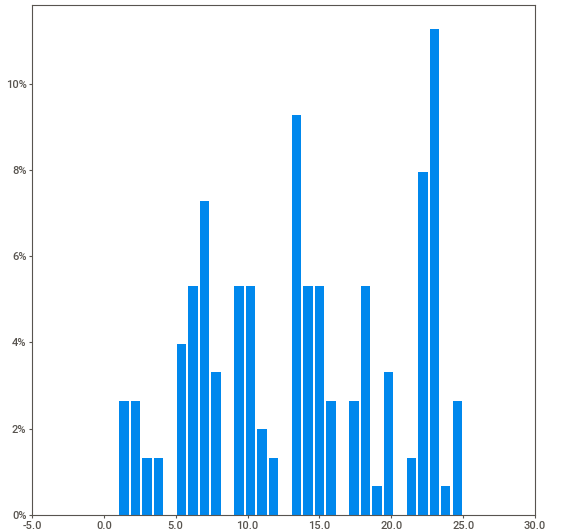
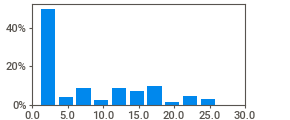
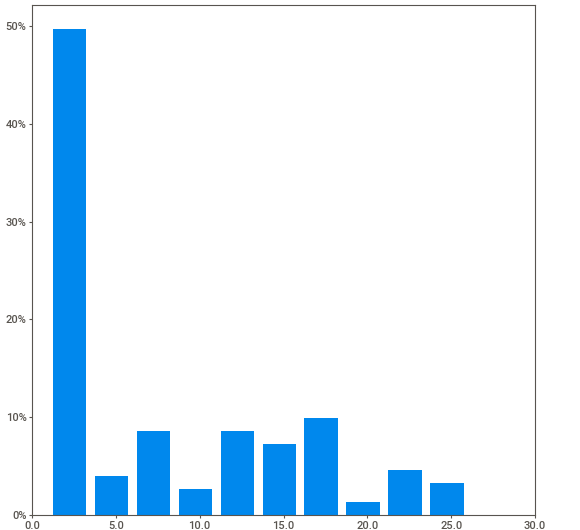
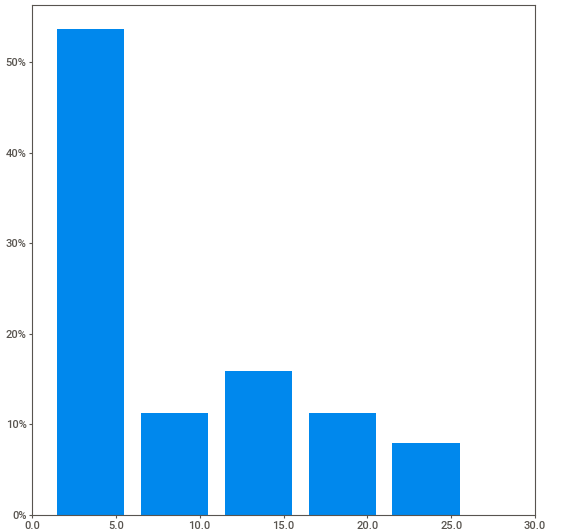
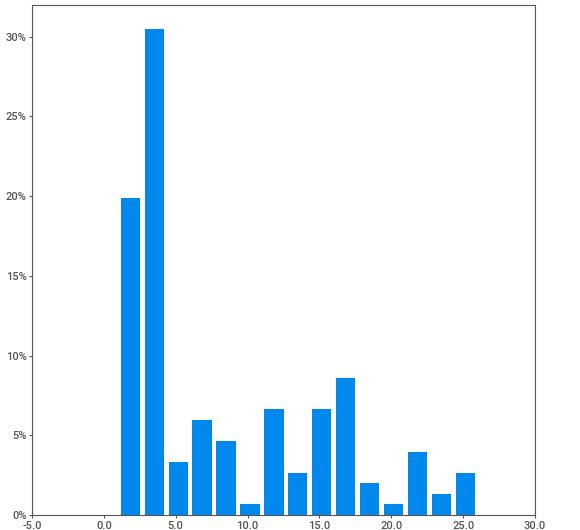
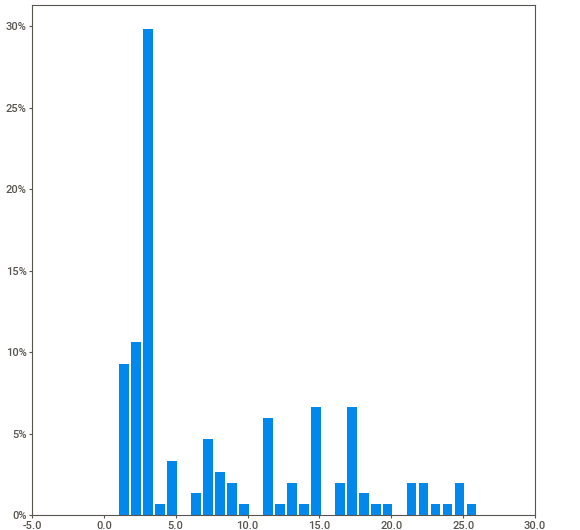
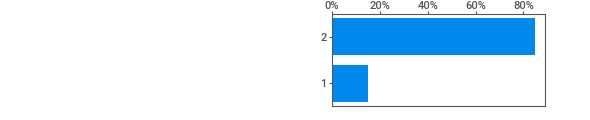
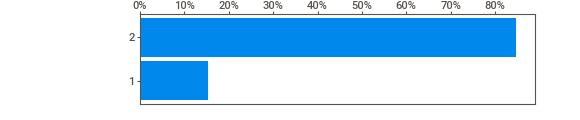
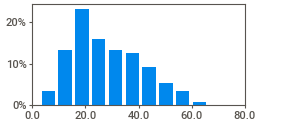
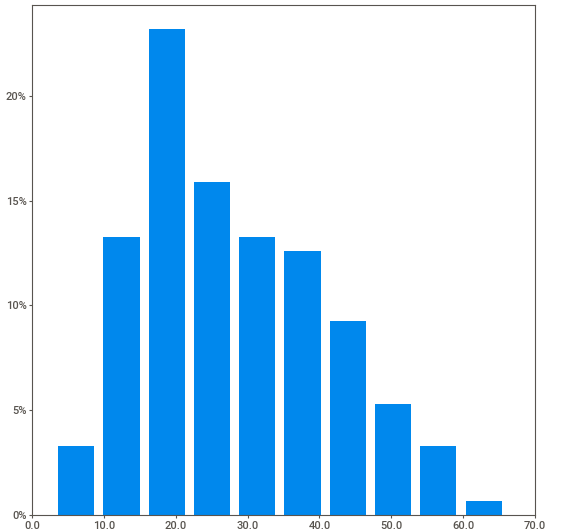
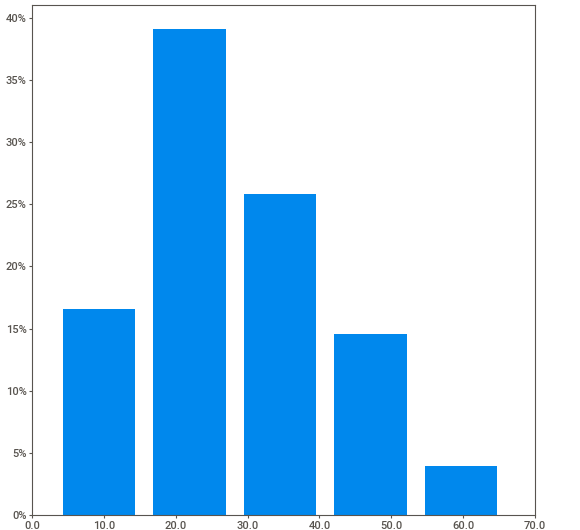
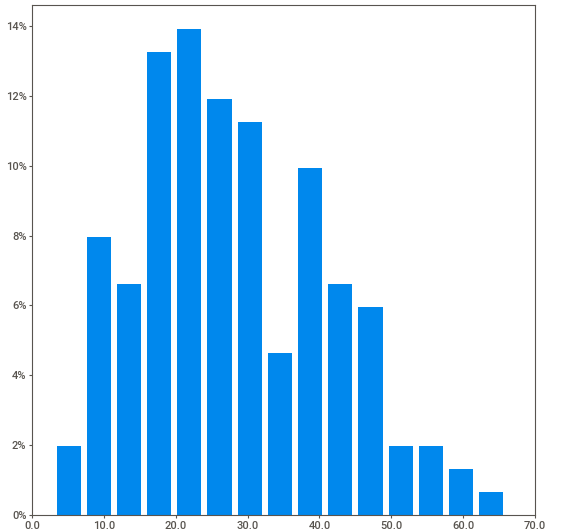
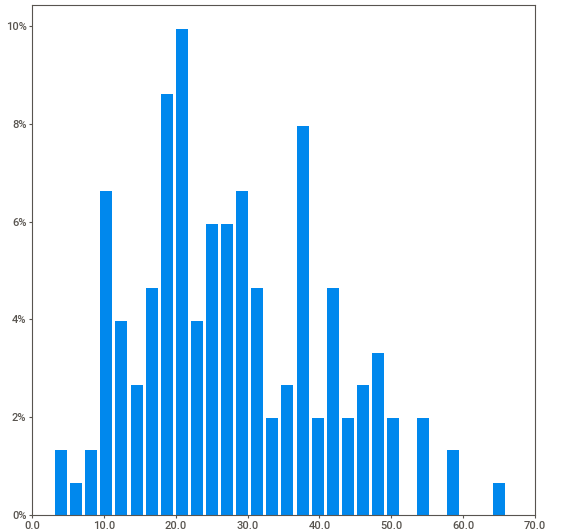
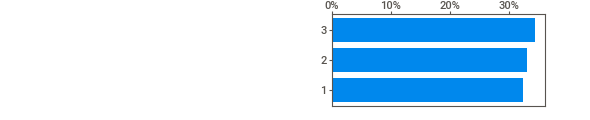
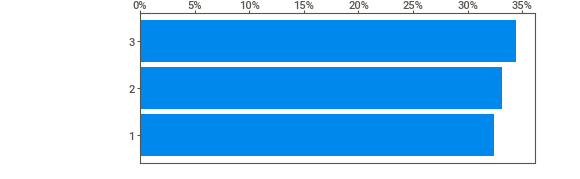
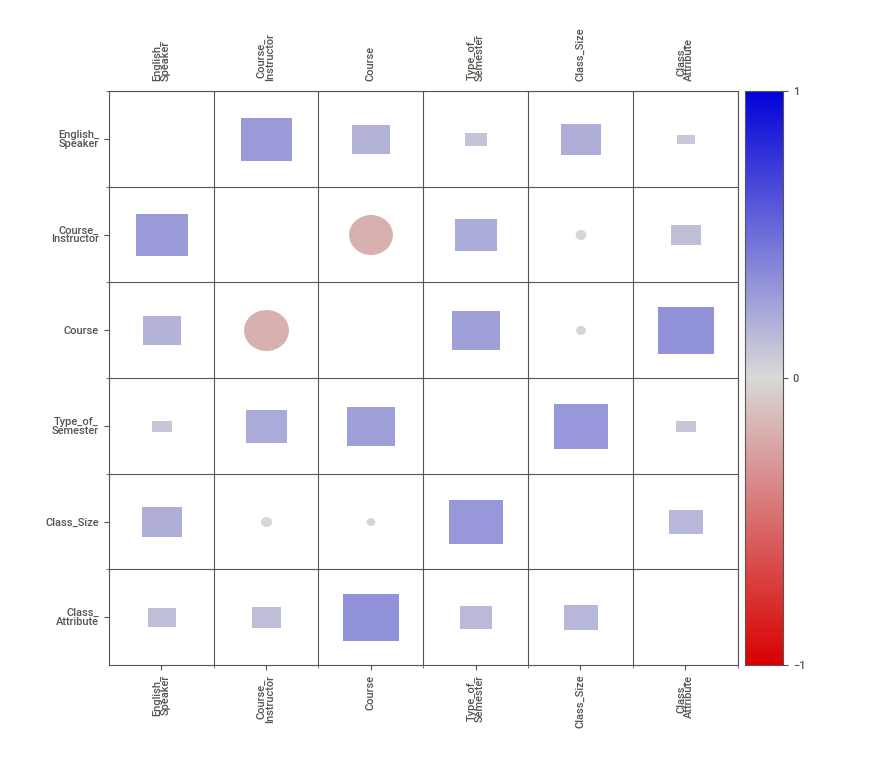
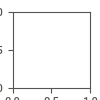

In [12]:
# Using Automated Library for Univariate Analysis
my_report = sv.analyze(data_of_teacher_assist)
my_report.show_notebook()

### <span style="color:Green">Observation from Univariate Analysis : </span>

<span style="color:blue">English Speaker : </span>
- It is a Categorical Column.
- Having only 2 distinct value 1 or 2, i.e 1:Non-English Speaker and 2: English Speaker.
- Non-English Speaker is 81% and English Speaker is 19 % only.
- No missing value.

<span style="color:blue"> Course Instructor : </span>
- Categorical Column but having numerical value in it .
- Having 25 distinct values, starting from 1 till 25.
- No Missing value.
- As skewness is -0.008 only, so its seems data is symmetrical only.

<span style="color:blue"> Course : </span> 

- Categorical Column but having numerical values in it.
- Having 26 distinct courses.
- No missing value.
- As data is categorical only so no need to focus on kurtosis and skewness.(Kurtosis showing -0.501 and skewness is 0.870 )

<span style="color:blue"> Type Of Semester </span> 

- It is a Categorical Column 
- Having only 2 distinct value 1 and 2. 1 represent Summer and 2 represent Regular.
- Regular(2) values is more compared to Summer(1).
- No Missing Values.

<span style="color:blue"> Class Size: </span> 

- It is a numerical column.
- Having too many Different different values in class size attribute.
- Minimun value is 3 and Maximum value is 66 in class size attribute.
- Having 46 disitinct value.
- Most frequent value is 19 and 20 that present in class size attribute.

<span style="color:blue"> Class Attribute: (Target Variable) </span> 
- It is Categorical Column.
- Having 3 distinct value i.e. Low(1),Medium(2),High(3)
- Almost value is equally distributed among three class attribute. 
 - **Low(1)** - 49 
 - **Medium(2)** - 50
 - **High(3)** - 52 

### 2. Bivariate Analysis

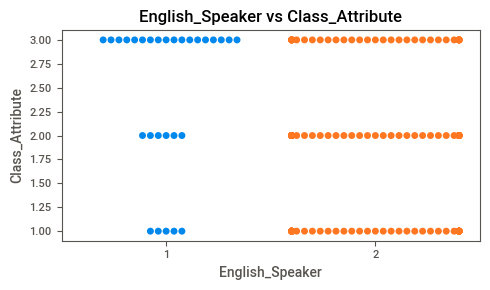

In [13]:
# Analyzing English Speaker column with respect to target column (Class_Attribute)
plt.rcParams["figure.figsize"] = (5,3)
sns.swarmplot(x= 'English_Speaker',y='Class_Attribute', data=data_of_teacher_assist).set(title='English_Speaker vs Class_Attribute')
plt.tight_layout()

### <span style="color:Green">Observation from Bivariate Analysis : </span>

<span style="color:blue"> 1. Analyzing English Speaker column with respect to target column(Class_Attribute):</span>

- With target Variable, Low(1)
  - Non-English Speaker is less than compared to English Speaker.
- With Target Variable,Medium(2)
  - Non-English Speaker is less than compared to English Speaker.
- With Target Variable, High(3)
  - Seems, equally distributed between Non-English Speaker and English Speaker.
  
  **Overall, we can say that English Speaker respect to Target Variable (Class_Atrribute) is more compared to Non-English Speaker.**

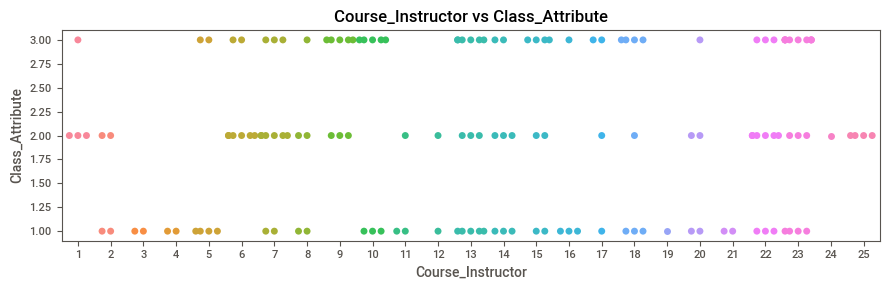

In [14]:
#Analyzing Course Instructor column with respect to target (Class_Attribute) 
plt.rcParams["figure.figsize"] = (9,3)
sns.swarmplot(x='Course_Instructor',y='Class_Attribute', data=data_of_teacher_assist).set(title='Course_Instructor vs Class_Attribute')
plt.tight_layout()

### <span style="color:Green">Observation from Bivariate Analysis : </span>

<span style="color:blue"> 2. Analyzing Course Instructor column with respect to target column(Class_Attribute):</span>
  
**Overall, we can say that Course Instructor is more in Low(1) Class_atrribute compared to medium and High Class_attribute.**

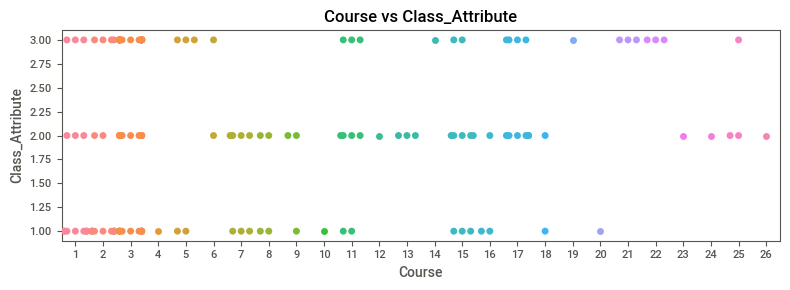

In [15]:
#Analyzing Course column with respect to target (Class_Attribute)
plt.rcParams["figure.figsize"] = (8,3)
sns.swarmplot(x='Course',y='Class_Attribute', data=data_of_teacher_assist).set(title='Course vs Class_Attribute')
plt.tight_layout()

### <span style="color:Green">Observation from Bivariate Analysis : </span>

<span style="color:blue"> 3. Analyzing Course column with respect to target column(Class_Attribute):</span>
  
- **Courses is more in Medium(1) Class_atrribute compared to Low and High Class_attribute.**
- **Bewteen 1 to 4 Courses all three class_attribute are present.**

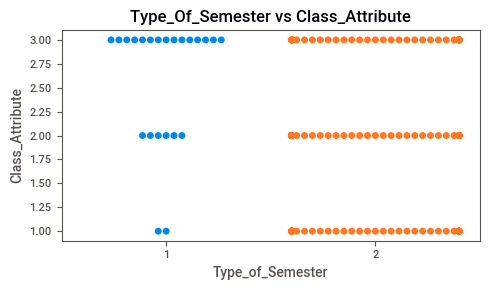

In [16]:
#Analyzing Type_Of_Semester column with respect to target (Class_Attribute)
plt.rcParams["figure.figsize"] = (5,3)
sns.swarmplot(x='Type_of_Semester',y='Class_Attribute', data=data_of_teacher_assist).set(title='Type_Of_Semester vs Class_Attribute')
plt.tight_layout()

### <span style="color:Green">Observation from Bivariate Analysis : </span>

<span style="color:blue"> 4. Analyzing Type_Of_Semester column with respect to target column(Class_Attribute):</span>

- With target Variable, Low(1)
  - Summer Semester is less than compared to Regualar Semester.
- With Target Variable,Medium(2)
  - Summer Semester is less than compared to Regualar Semester.
- With Target Variable, High(3)
  - Seems, Almost equally distributed between Summer and Regular Semester .
  
  **Overall, we can say that Regular Semester respect to Target Variable (Class_Atrribute) is more compared to Summer Semester.**

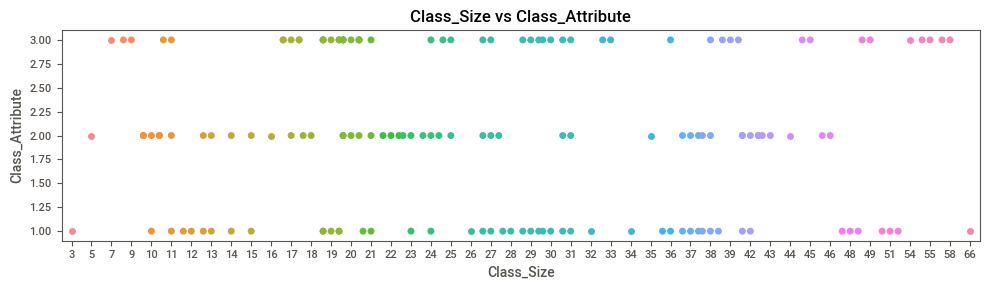

In [17]:
#Analyzing Class_Size column with respect to target (Class_Attribute)
plt.rcParams["figure.figsize"] = (10,3)
sns.swarmplot(x='Class_Size',y='Class_Attribute', data=data_of_teacher_assist).set(title='Class_Size vs Class_Attribute')
plt.tight_layout()

### <span style="color:Green">Observation from Bivariate Analysis : </span>

<span style="color:blue"> 5. Analyzing Class_Size column with respect to target column(Class_Attribute):</span>
  
- **Overall,we can say that Class_size is almost equally distributed in all three class_attribute.**


### 3. Multivariate Analysis

<Figure size 2000x1000 with 0 Axes>

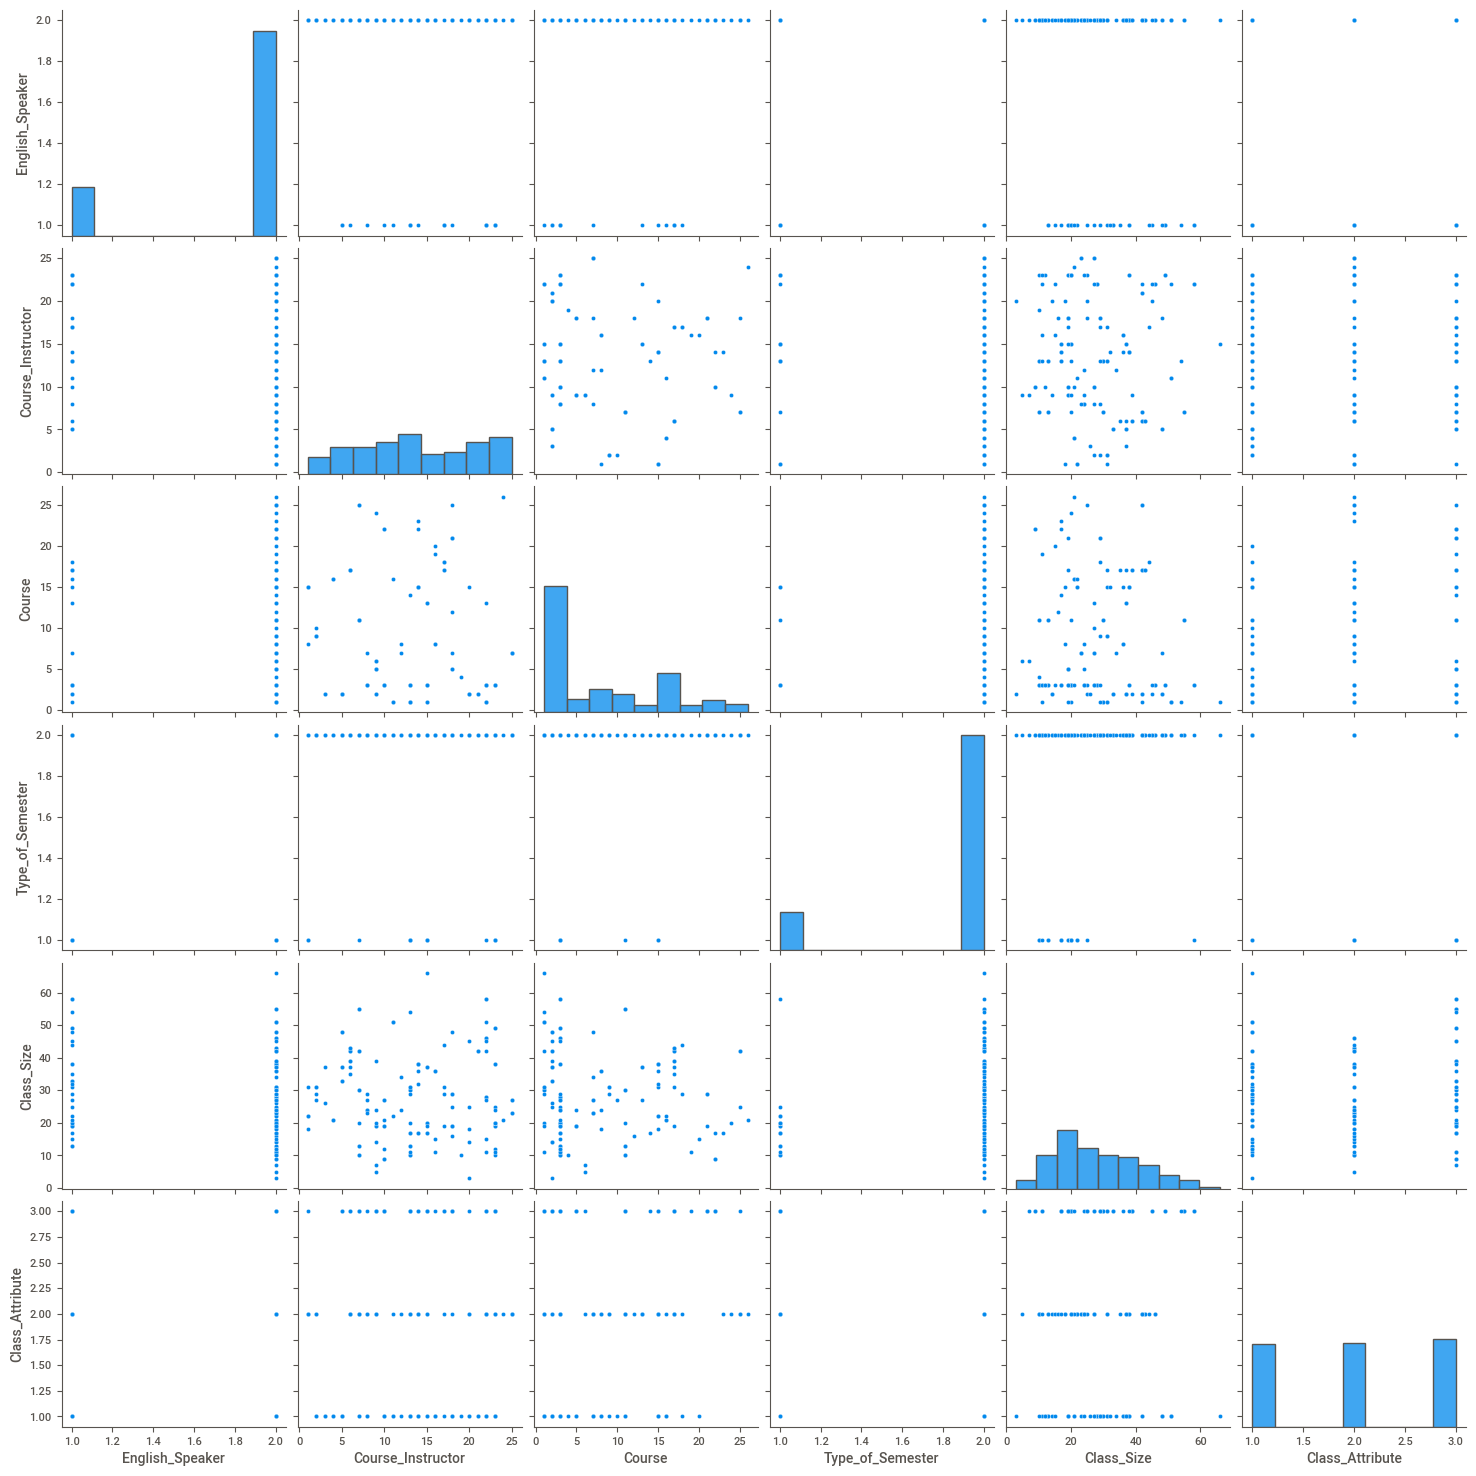

In [18]:
# Analyzing Multivariate 
plt.figure(figsize=(20, 10))
sns.pairplot(data_of_teacher_assist)
plt.show()

<h4 style=color:green>Pairplot is shown with all the attribute</h3>

Text(0.5, 1.0, 'According to Target (Class_Attribute) Course Instructor is English Speaker or not ')

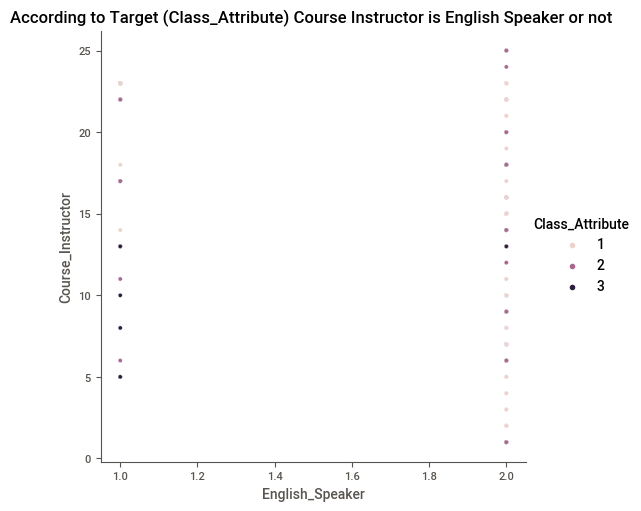

In [19]:
# Analyzing Course Instructor is English Speaker or not with respect to target variable(class_attribute)
sns.relplot(data=data_of_teacher_assist, y="Course_Instructor", x="English_Speaker",hue = 'Class_Attribute')
plt.title("According to Target (Class_Attribute) Course Instructor is English Speaker or not ")

<h4 style=color:green>Course Instructor is more in Non-English Speaker as compared to English Speaker with respect to tagret attribute (class_attribute) </h4>

Text(0.5, 1.0, 'according to class atrribute which course is present in which type of semester')

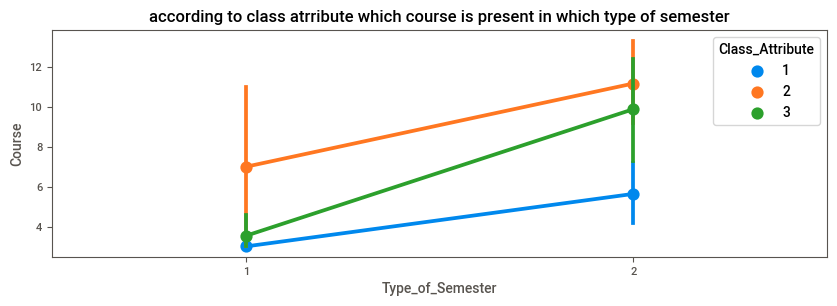

In [20]:
# Analyzing which course is present in which type of semester with respect to target variable(class_attribute)
sns.pointplot(data=data_of_teacher_assist, y="Course", x="Type_of_Semester",hue = 'Class_Attribute');
plt.title("according to class atrribute which course is present in which type of semester")

<h4 style=color:green>Courses are present in more Regular type of semester with respect to target variable(class_atrribute) </h4>

Text(0.5, 1.0, 'according to class atrribute in which course which course instructor is present')

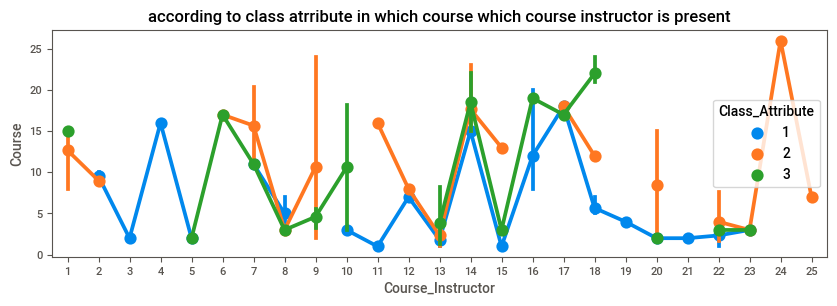

In [21]:
# Analyzing which course instructor take which course respect to target variable(class_attribute)
sns.pointplot(data=data_of_teacher_assist, y="Course", x="Course_Instructor",hue = 'Class_Attribute');
plt.title("according to class atrribute in which course which course instructor is present")

<h4 style=color:green>Seems Course Instructor is almost equally distributed in different courses with respect to target variable(class_attribute)</h4>

Text(0.5, 1.0, 'according to class atrribute in which course english speaker is present')

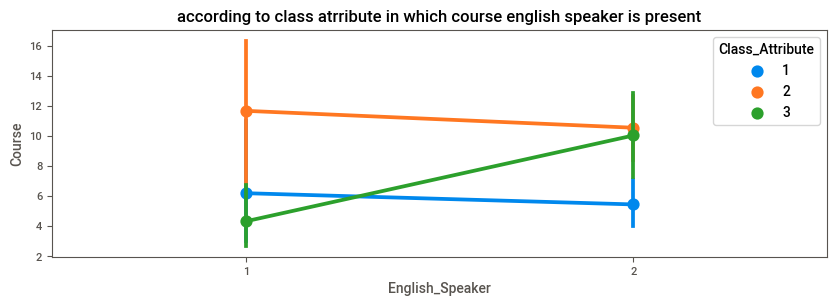

In [22]:
# Analyzing English Speaker is present in which course according to target variable(class_atrribute)
sns.pointplot(data=data_of_teacher_assist, y="Course", x="English_Speaker",hue = 'Class_Attribute');
plt.title("according to class atrribute in which course english speaker is present")

<h4 style=color:green>
- English Speaker in different Courses are more present in Medium Class_Attribute <br>
- English Speaker in different courses are almost equally distributed in Low and High Class_Attribute</h4>

## Data Preprocessing

### A. Checking Null values and Unwanted Columns

In [23]:
# Checking sum of null values in all the columns in given dataset
data_of_teacher_assist.isnull().sum()

English_Speaker      0
Course_Instructor    0
Course               0
Type_of_Semester     0
Class_Size           0
Class_Attribute      0
dtype: int64

<h4 style=color:green> No Null value present in the dataset</h4>

**It seems that there are no missing values in our data. Great, let's see the distribution of data:**

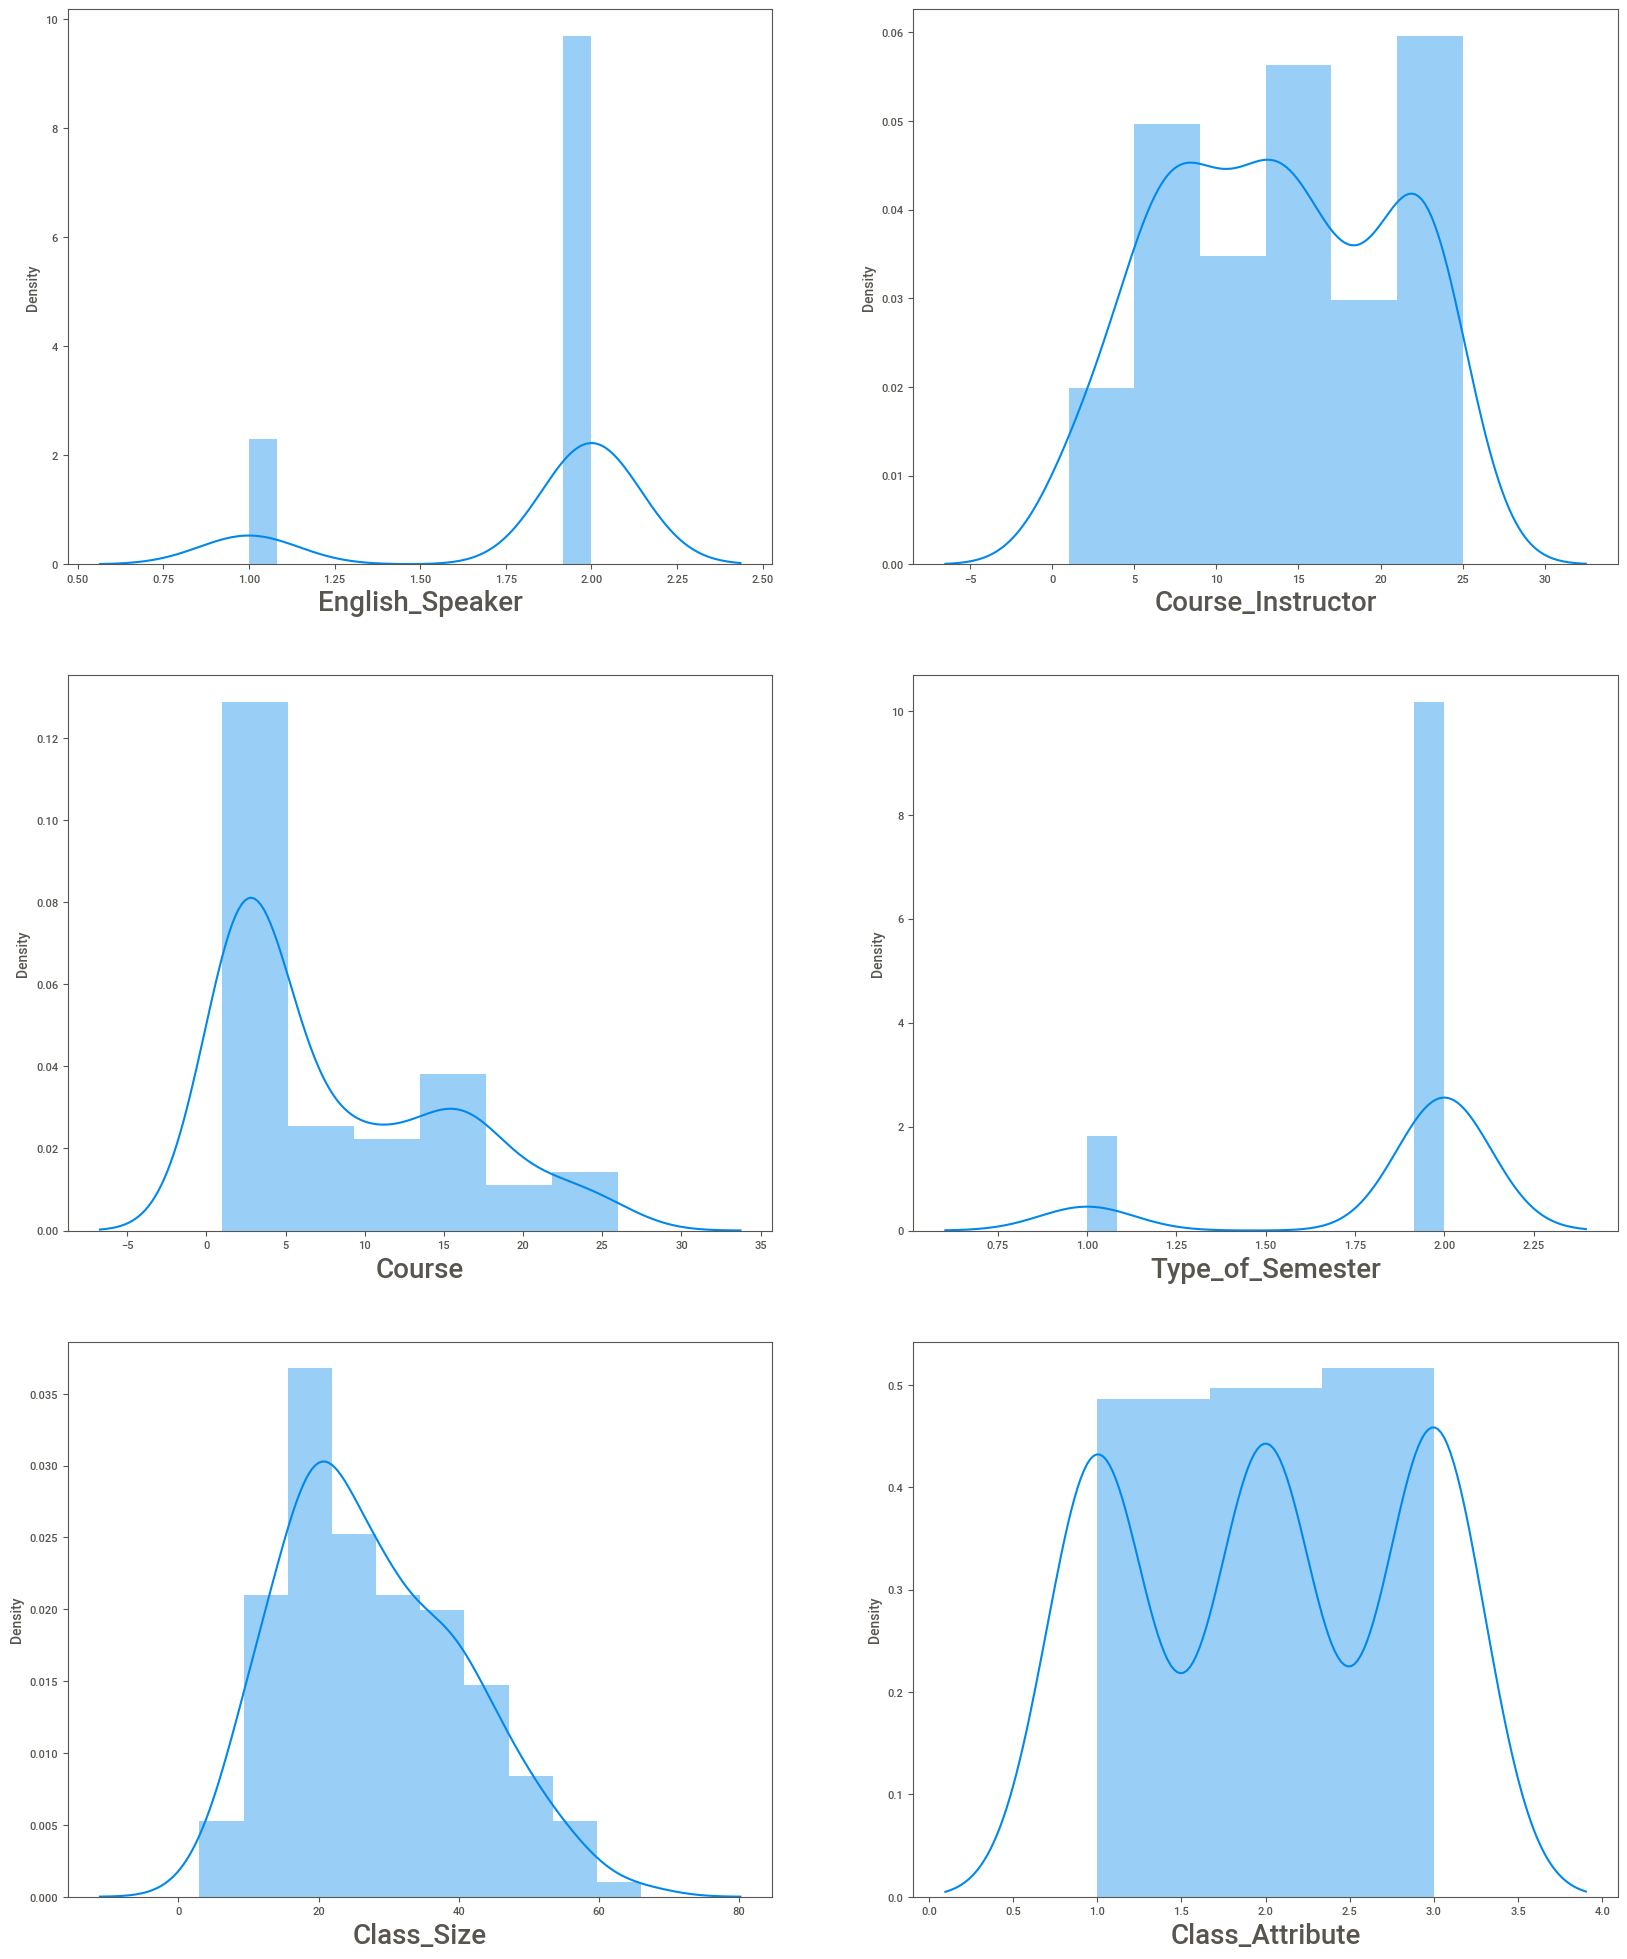

In [24]:
#Creating variable to store the column of the dataset
data=data_of_teacher_assist[['English_Speaker', 'Course_Instructor', 'Course', 'Type_of_Semester',
       'Class_Size', 'Class_Attribute']]

# let see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')#defining  canvas size
plotnumber = 1 #maintian count for graph

for column in data:
    if plotnumber<=6 :# as there are 6 columns in the data
        ax = plt.subplot(3,2,plotnumber)# plotting 6 graphs (4-rows,2-columns) ,plotnumber is for count 
        sns.distplot(data[column])#plotting dist plot to know distribution
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

<h4 style=color:green>Seems data distribtion looking good for all the column. </h4>

### B. Checking for Outliers

In [25]:
#Storing Numerical column at one place
num_col=data_of_teacher_assist[['Course_Instructor','Course','Class_Size']]

<h4 style=color:green>num_col variable is created and numerical column is stored in it.</h4>

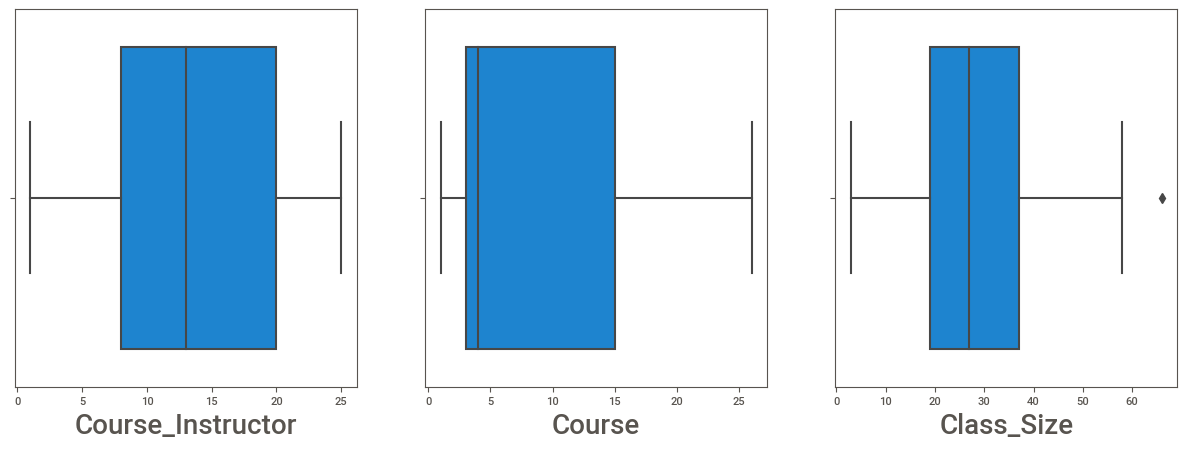

In [26]:
 #Checking for outliers for numerical
# let's see how data is distributed 
plt.figure(figsize=(15,5), facecolor='white')
plotnumber = 1

for column in num_col:
    if plotnumber<=3 :
        ax = plt.subplot(1,3,plotnumber)
        sns.boxplot(data[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

<h4 style=color:green>
- No outliers in Course_Instructor and Course. <br>
- Seems One outlier present in Class_size</h4>

In [27]:
#Checking Q1,Q3,IQR,lower_limit,upper_limit,below_lowerlimit_total rows and above_upperlimit_total_rows

#storing dataset into df
df=data_of_teacher_assist
# Outlier detection using IQR method for numerical features
Q1_df = []
Q3_df = []
IQR_df = []
lower_limit_df = []
upper_limit_df = []
below_lowerlimit_total_rows_df = []
above_upperlimit_total_rows_df =  []
for cols in num_col:
    Q1 = df[cols].quantile(0.25)
    Q1_df.append(Q1)
    Q3 = df[cols].quantile(0.75)
    Q3_df.append(Q3)
    IQR = Q3 - Q1
    IQR_df.append(IQR)
    lower_limit = Q1 - 1.5 * IQR
    lower_limit_df.append(lower_limit)
    upper_limit = Q3 + 1.5 * IQR
    upper_limit_df.append(upper_limit)
    below_lowerlimit_total_rows = (df[cols] < lower_limit).sum()
    below_lowerlimit_total_rows_df.append(below_lowerlimit_total_rows)
    above_upperlimit_total_rows = (df[cols] > upper_limit).sum()
    above_upperlimit_total_rows_df.append(above_upperlimit_total_rows)
    
df_list = list(zip(Q1_df,Q3_df,IQR_df,lower_limit_df,upper_limit_df,below_lowerlimit_total_rows_df,above_upperlimit_total_rows_df))

df_outliers = pd.DataFrame(df_list,columns=['Q1','Q3','IQR','lower_limit','upper_limit','below_lowerlimit_total_rows','above_upperlimit_total_rows'],index=['Course_Instructor','Course','Class_Size'])

df_outliers



,Q1,Q3,IQR,lower_limit,upper_limit,below_lowerlimit_total_rows,above_upperlimit_total_rows
Course_Instructor,8.0,20.0,12.0,-10.0,38.0,0,0
Course,3.0,15.0,12.0,-15.0,33.0,0,0
Class_Size,19.0,37.0,18.0,-8.0,64.0,0,1


<h4 style=color:green>
Only one Outlier is present in Class_size</h4>

In [28]:
# identify outliers
outliers = [x for x in data_of_teacher_assist['Class_Size'] if x < lower_limit_df[2] or x > upper_limit_df[2]]
print('Identified outliers: %d' % len(outliers))


Identified outliers: 1


<h4 style=color:green>
Identified Outliers as 1 only</h4>

In [29]:
# remove outliers
outliers_removed = [x for x in data_of_teacher_assist['Class_Size'] if x > lower_limit_df[2] and x < upper_limit_df[2]]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 150


<h4 style=color:green>
- 150 columns left with no outliers. <br>
- Other columns like English Speaker and type of semester is categorial in nature so no need to check outlier.
</h4>

## Feature Selection

###  A. Checking For Correlation

[]

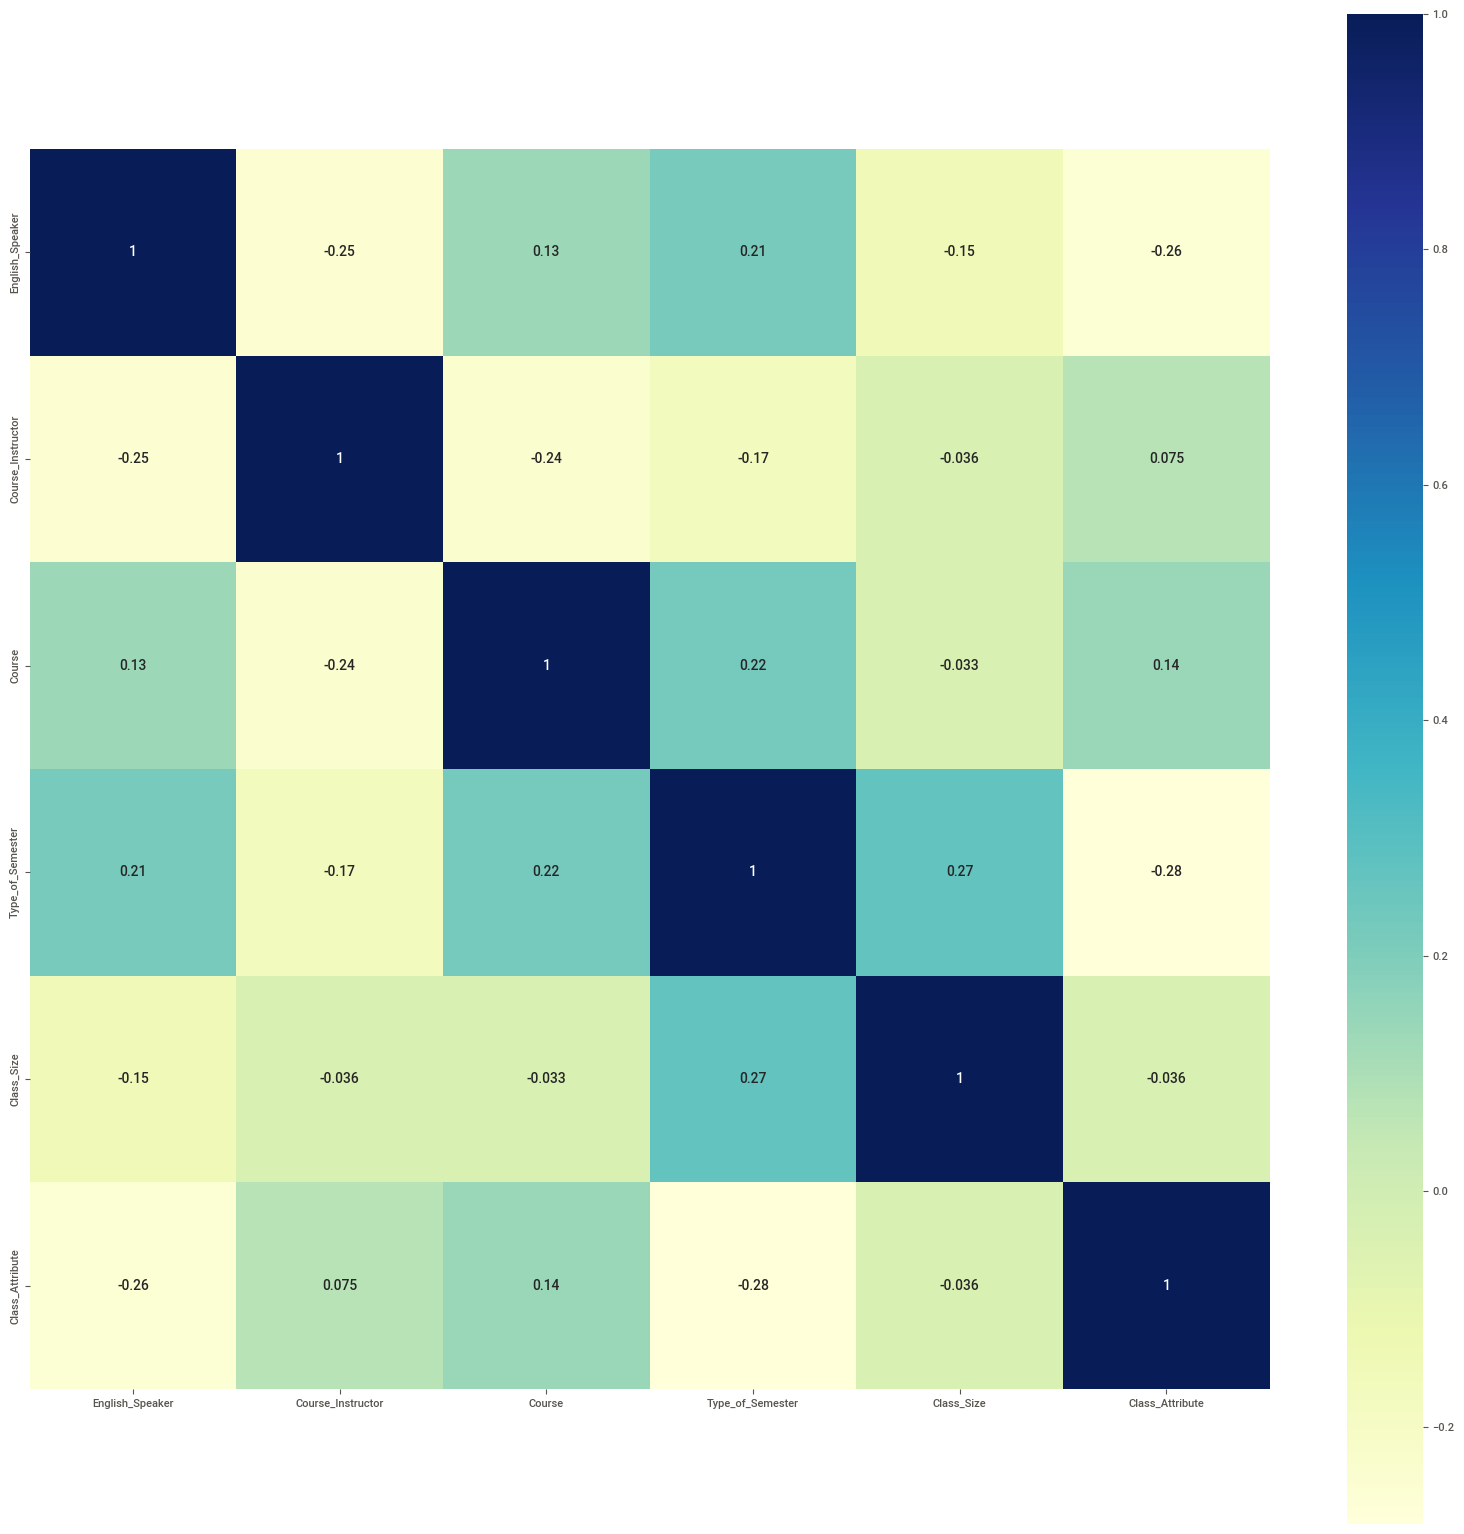

In [30]:
# plotting heatmap to check correlation 
plt.figure(figsize = (20,20))
sns.heatmap(data_of_teacher_assist.corr(), cmap="YlGnBu", annot = True , cbar=True , square= True)
plt.plot()

<h3 style=color:green>No correlated features are present</h3>

###  B. Checking For Duplicated Rows

In [31]:
#Cchecking how many total number of rows are duplicated
data_of_teacher_assist.duplicated().sum()

41

<h4 style=color:green>41 duplicate data found in dataset</h4>

In [32]:
#Displaying duplicated rows
data_of_teacher_assist[data_of_teacher_assist.duplicated()]

,English_Speaker,Course_Instructor,Course,Type_of_Semester,Class_Size,Class_Attribute
39,1,23,3,1,19,3
40,2,15,3,1,17,3
41,1,23,3,2,49,3
42,1,5,2,2,33,3
43,2,7,11,2,55,3
44,2,23,3,1,20,3
45,2,9,5,2,19,3
46,2,10,3,2,27,3
48,2,15,3,1,20,3
49,2,10,22,2,9,3


<h4 style=color:green>41 rows are shown above that is duplicate in the dataset.</h4>

In [33]:
#Removing duplicates from the dataset
data_of_teacher_assist.drop_duplicates(inplace=True)

<h4 style=color:green>Duplicates rows are removed and also get updated in data_of_teacher_assist database.</h4>

In [34]:
# Ensuring there is no more duplicates in the dataset
data_of_teacher_assist[data_of_teacher_assist.duplicated()]

,English_Speaker,Course_Instructor,Course,Type_of_Semester,Class_Size,Class_Attribute


<h4 style=color:green>No more duplicate data is remaining in our dataset.</h4>

In [35]:
# Checking the constant features in numerical column
data_of_teacher_assist.describe()

,English_Speaker,Course_Instructor,Course,Type_of_Semester,Class_Size,Class_Attribute
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,1.772727,14.027273,8.145455,1.863636,27.281818,2.018182
std,0.420988,6.780245,7.163665,0.344745,13.141525,0.823751
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,9.000000,3.000000,2.000000,18.250000,1.000000
50%,2.000000,14.000000,3.500000,2.000000,25.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


<h4 style=color:green>As Standard deviation of any features is not 0, that means we don't have any constant feature.</h4>

## Model Creation

#### Preparing Training and testing data

In [36]:
# Defining x and y
X = data_of_teacher_assist.drop(columns = ['Class_Attribute']) 
y = data_of_teacher_assist['Class_Attribute'] ##  target variable or the variable which we have to predict

<h4 style=color:green>X and y varibale created for training and testing data</h4>

In [37]:
# Printing X value
print('\033[1m' + 'X' + '\033[0m' + '\n',X)

X
      English_Speaker  Course_Instructor  Course  Type_of_Semester  Class_Size
0                  1                 23       3                 1          19
1                  2                 15       3                 1          17
2                  1                 23       3                 2          49
3                  1                  5       2                 2          33
4                  2                  7      11                 2          55
..               ...                ...     ...               ...         ...
146                2                  3       2                 2          26
147                2                 10       3                 2          12
148                1                 18       7                 2          48
149                2                 22       1                 2          51
150                2                  2      10                 2          27

[110 rows x 5 columns]


In [38]:
# Printing y value
print(y)

0      3
1      3
2      3
3      3
4      3
      ..
146    1
147    1
148    1
149    1
150    1
Name: Class_Attribute, Length: 110, dtype: int64


In [39]:
#setting up training and testing data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state= 42 )
X_test_copy=X_test.copy()

<h4 style=color:green>Training and Testing got set up With X and y variable.</h4>

In [40]:
## Scaling the data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

<h4 style=color:green>Scaling of data is done using fit_transform()</h4>

In [41]:
#setting up training and testing data
X_train , X_test , y_train , y_test = train_test_split(X_scaled,y,test_size=0.2 , random_state= 42 )

<h4 style=color:green>Training and Testing got set up With scaled data.</h4>

In [42]:
#checked the distribution of target variable with function Counter()
Counter(y)

Counter({3: 38, 2: 36, 1: 36})

### Testing The Model

### 1. Logistic Regression 

Logistic Regression Score are as follows:
Accuracy Score :
 0.45454545454545453
Recall Score :
 0.45454545454545453
Precison Score :
 0.5544077134986225
F1 Score :
 0.465564738292011
Classification Report  :
               precision    recall  f1-score   support

           1       0.64      0.70      0.67        10
           2       0.12      0.25      0.17         4
           3       0.67      0.25      0.36         8

    accuracy                           0.45        22
   macro avg       0.48      0.40      0.40        22
weighted avg       0.55      0.45      0.47        22

Confusion Matrix  :


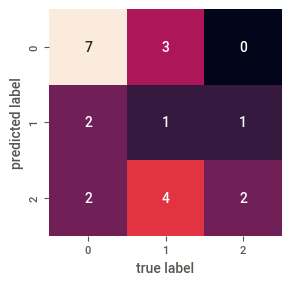

In [43]:
# logistic Regression for multiclass classification ovr-> one vs rest
LR=LogisticRegression(multi_class='ovr',class_weight='balanced')

LR.fit(X_train,y_train) #  training model

LR_pred=LR.predict(X_test)# predicting the results

print("Logistic Regression Score are as follows:")
print("=========================================")
LR_accuracy=accuracy_score(y_test,LR_pred) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',LR_accuracy) # printing accuracy score

print("=========================================")
LR_recall=recall_score(y_test,LR_pred,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',LR_recall) # #printing recall score
print("=========================================")

LR_precision=precision_score(y_test,LR_pred,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',LR_precision) # printing precision score

print("=========================================")
LR_f1score=f1_score(y_test,LR_pred,average='weighted')# checking F1_Score
print('\033[1m' + 'F1 Score :' + '\033[0m' + '\n',LR_f1score) # printing F1_score

print("=========================================")
print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,LR_pred)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m' )
def plot_conf_mat(y_test,LR_pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,LR_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,LR_pred)

### 2. Support Vector Machine

Support Vector Machine Score are as follows:
Accuracy Score :
 0.45454545454545453
Recall Score :
 0.45454545454545453
Precison Score :
 0.6163911845730027
F1_Score :
 0.48374655647382914
Classification Report  :
               precision    recall  f1-score   support

           1       0.75      0.60      0.67        10
           2       0.18      0.50      0.27         4
           3       0.67      0.25      0.36         8

    accuracy                           0.45        22
   macro avg       0.53      0.45      0.43        22
weighted avg       0.62      0.45      0.48        22

Confusion Matrix  :


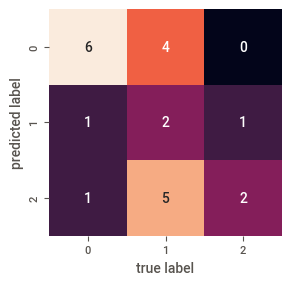

In [44]:
# Support Vector Machine for multiclass classification 
SVM=SVC(class_weight='balanced')

SVM.fit(X_train,y_train) #  training model

SVM_pred=SVM.predict(X_test)# predicting the results

print("Support Vector Machine Score are as follows:")
print("=========================================")
SVM_accuracy=accuracy_score(y_test,SVM_pred) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',SVM_accuracy) # printing accuracy score

print("=========================================")
SVM_recall=recall_score(y_test,SVM_pred,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',SVM_recall) # #printing recall score
print("=========================================")

SVM_precision=precision_score(y_test,SVM_pred,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',SVM_precision) # printing precision score
print("=========================================")

SVM_f1score=f1_score(y_test,SVM_pred,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',SVM_f1score) # printing F1_score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,SVM_pred)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,SVM_pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,SVM_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,SVM_pred)

### 3. KNeighborsClassifier

K Neighbors Classifier Score are as follows:
Accuracy Score :
 0.5
Recall Score :
 0.5
Precison Score :
 0.4497835497835498
F1_Score  :
 0.44742883379247017
Classification Report  :
               precision    recall  f1-score   support

           1       0.64      0.90      0.75        10
           2       0.20      0.25      0.22         4
           3       0.33      0.12      0.18         8

    accuracy                           0.50        22
   macro avg       0.39      0.42      0.38        22
weighted avg       0.45      0.50      0.45        22

Confusion Matrix  :


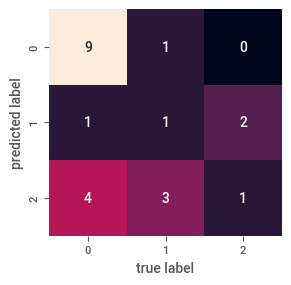

In [45]:
# K Neighbors Classifier for multiclass classification 
KN=KNeighborsClassifier()

KN.fit(X_train,y_train) #  training model

KN_pred=KN.predict(X_test)# predicting the results

print("K Neighbors Classifier Score are as follows:")
print("=========================================")
KN_accuracy=accuracy_score(y_test,KN_pred) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',KN_accuracy) # printing accuracy score

print("=========================================")
KN_recall=recall_score(y_test,KN_pred,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',KN_recall) # #printing recall score
print("=========================================")

KN_precision=precision_score(y_test,KN_pred,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',KN_precision) # printing precision score
print("=========================================")

KN_f1score=f1_score(y_test,KN_pred,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score  :' + '\033[0m' + '\n',KN_f1score) # printing F1_score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,KN_pred)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,KN_pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,KN_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,KN_pred)

### 4. RandomForestClassifier

Random Forest Classifier Score are as follows:
Accuracy Score :
 0.3181818181818182
Recall Score :
 0.3181818181818182
Precison Score :
 0.4454545454545455
F1_Score :
 0.36985236985236986
Classification Report  :
               precision    recall  f1-score   support

           1       0.50      0.40      0.44        10
           2       0.00      0.00      0.00         4
           3       0.60      0.38      0.46         8

    accuracy                           0.32        22
   macro avg       0.37      0.26      0.30        22
weighted avg       0.45      0.32      0.37        22

Confusion Matrix  :


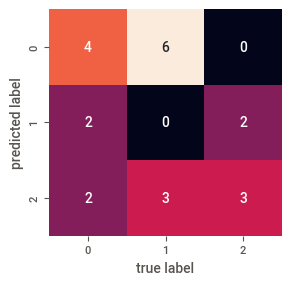

In [46]:
# Random Forest Classifier for multiclass classification 
RFC=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

RFC.fit(X_train,y_train) #  training model

RFC_pred=RFC.predict(X_test)# predicting the results

print("Random Forest Classifier Score are as follows:")
print("=========================================")
RFC_accuracy=accuracy_score(y_test,RFC_pred) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',RFC_accuracy) # printing accuracy score

print("=========================================")
RFC_recall=recall_score(y_test,RFC_pred,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',RFC_recall) # #printing recall score
print("=========================================")

RFC_precision=precision_score(y_test,RFC_pred,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',RFC_precision) # printing precision score
print("=========================================")

RFC_f1score=f1_score(y_test,RFC_pred,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',RFC_f1score) # printing F1_score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,RFC_pred)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,RFC_pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,RFC_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,RFC_pred)

### 5. GradientBoostingClassifier

Gradient Boosting Classifierr Score are as follows:
Accuracy Score :
 0.3181818181818182
Recall Score :
 0.3181818181818182
Precison Score :
 0.43116883116883115
F1_Score :
 0.3542340012928248
Classification Report  :
               precision    recall  f1-score   support

           1       0.43      0.30      0.35        10
           2       0.10      0.25      0.14         4
           3       0.60      0.38      0.46         8

    accuracy                           0.32        22
   macro avg       0.38      0.31      0.32        22
weighted avg       0.43      0.32      0.35        22

Confusion Matrix  :


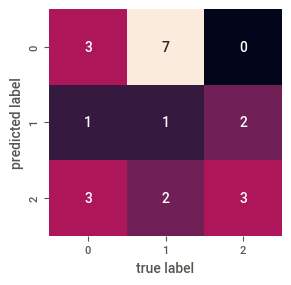

In [47]:
# Gradient Boosting Classifier for multiclass classification 
GB=GradientBoostingClassifier()

GB.fit(X_train,y_train) #  training model

GB_pred=GB.predict(X_test)# predicting the results

print("Gradient Boosting Classifierr Score are as follows:")
print("=========================================")
GB_accuracy=accuracy_score(y_test,GB_pred) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',GB_accuracy) # printing accuracy score

print("=========================================")
GB_recall=recall_score(y_test,GB_pred,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',GB_recall) # #printing recall score
print("=========================================")

GB_precision=precision_score(y_test,GB_pred,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',GB_precision) # printing precision score
print("=========================================")

GB_f1score=f1_score(y_test,GB_pred,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',GB_f1score) # printing F1_score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,GB_pred)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,GB_pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,GB_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,GB_pred)

### 6. MLPClassifier

MLP Classifier Score are as follows:
Accuracy Score :
 0.4090909090909091
Recall Score :
 0.4090909090909091
Precison Score :
 0.3939393939393939
F1_Score :
 0.4010695187165776
Classification Report  :
               precision    recall  f1-score   support

           1       0.60      0.60      0.60        10
           2       0.00      0.00      0.00         4
           3       0.33      0.38      0.35         8

    accuracy                           0.41        22
   macro avg       0.31      0.33      0.32        22
weighted avg       0.39      0.41      0.40        22

Confusion Matrix  :


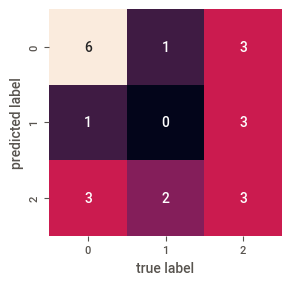

In [48]:
# MLP Classifier for multiclass classification 
ML=MLPClassifier(hidden_layer_sizes=(50,3),learning_rate_init=0.1,max_iter=100,random_state=42)

ML.fit(X_train,y_train) #  training model

ML_pred=ML.predict(X_test)# predicting the results

print("MLP Classifier Score are as follows:")
print("=========================================")
ML_accuracy=accuracy_score(y_test,ML_pred) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',ML_accuracy) # printing accuracy score

print("=========================================")
ML_recall=recall_score(y_test,ML_pred,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',ML_recall) # #printing recall score
print("=========================================")

ML_precision=precision_score(y_test,ML_pred,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',ML_precision) # printing precision score
print("=========================================")

ML_f1score=f1_score(y_test,ML_pred,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',ML_f1score) # printing F1_score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,ML_pred)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,ML_pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,ML_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,ML_pred)

### 7. CatBoostClassifier

In [49]:
# MLP Classifier for multiclass classification 
CB=CatBoostClassifier(random_state=42)

CB.fit(X_train,y_train) #  training model

CB_pred=CB.predict(X_test)# predicting the results

Learning rate set to 0.069902
0:	learn: 1.0892742	total: 144ms	remaining: 2m 24s
1:	learn: 1.0804584	total: 146ms	remaining: 1m 12s
2:	learn: 1.0703552	total: 148ms	remaining: 49s
3:	learn: 1.0604758	total: 149ms	remaining: 37.2s
4:	learn: 1.0547581	total: 150ms	remaining: 29.9s
5:	learn: 1.0457447	total: 152ms	remaining: 25.1s
6:	learn: 1.0364781	total: 153ms	remaining: 21.7s
7:	learn: 1.0258253	total: 154ms	remaining: 19s
8:	learn: 1.0176626	total: 154ms	remaining: 17s
9:	learn: 1.0112964	total: 155ms	remaining: 15.3s
10:	learn: 1.0019312	total: 155ms	remaining: 14s
11:	learn: 0.9957953	total: 156ms	remaining: 12.8s
12:	learn: 0.9894638	total: 156ms	remaining: 11.9s
13:	learn: 0.9843216	total: 157ms	remaining: 11s
14:	learn: 0.9755557	total: 157ms	remaining: 10.3s
15:	learn: 0.9682833	total: 158ms	remaining: 9.71s
16:	learn: 0.9622567	total: 159ms	remaining: 9.17s
17:	learn: 0.9535352	total: 159ms	remaining: 8.68s
18:	learn: 0.9469611	total: 160ms	remaining: 8.25s
19:	learn: 0.938531

236:	learn: 0.3905381	total: 296ms	remaining: 953ms
237:	learn: 0.3897339	total: 297ms	remaining: 950ms
238:	learn: 0.3887308	total: 297ms	remaining: 947ms
239:	learn: 0.3879097	total: 298ms	remaining: 944ms
240:	learn: 0.3871269	total: 299ms	remaining: 941ms
241:	learn: 0.3857152	total: 299ms	remaining: 937ms
242:	learn: 0.3847252	total: 300ms	remaining: 934ms
243:	learn: 0.3838843	total: 301ms	remaining: 931ms
244:	learn: 0.3829000	total: 301ms	remaining: 928ms
245:	learn: 0.3820968	total: 302ms	remaining: 925ms
246:	learn: 0.3811612	total: 302ms	remaining: 922ms
247:	learn: 0.3803088	total: 303ms	remaining: 919ms
248:	learn: 0.3794846	total: 304ms	remaining: 916ms
249:	learn: 0.3788144	total: 304ms	remaining: 913ms
250:	learn: 0.3781180	total: 305ms	remaining: 910ms
251:	learn: 0.3770816	total: 306ms	remaining: 907ms
252:	learn: 0.3757040	total: 306ms	remaining: 904ms
253:	learn: 0.3748438	total: 307ms	remaining: 901ms
254:	learn: 0.3742608	total: 307ms	remaining: 898ms
255:	learn: 

496:	learn: 0.2399686	total: 453ms	remaining: 458ms
497:	learn: 0.2396558	total: 454ms	remaining: 457ms
498:	learn: 0.2393530	total: 454ms	remaining: 456ms
499:	learn: 0.2390129	total: 455ms	remaining: 455ms
500:	learn: 0.2387496	total: 455ms	remaining: 454ms
501:	learn: 0.2384252	total: 456ms	remaining: 452ms
502:	learn: 0.2381339	total: 457ms	remaining: 451ms
503:	learn: 0.2378388	total: 457ms	remaining: 450ms
504:	learn: 0.2377011	total: 458ms	remaining: 449ms
505:	learn: 0.2372352	total: 458ms	remaining: 448ms
506:	learn: 0.2367731	total: 459ms	remaining: 446ms
507:	learn: 0.2363941	total: 460ms	remaining: 445ms
508:	learn: 0.2361575	total: 460ms	remaining: 444ms
509:	learn: 0.2358566	total: 461ms	remaining: 443ms
510:	learn: 0.2355868	total: 461ms	remaining: 441ms
511:	learn: 0.2352919	total: 462ms	remaining: 440ms
512:	learn: 0.2351153	total: 463ms	remaining: 439ms
513:	learn: 0.2347098	total: 463ms	remaining: 438ms
514:	learn: 0.2345016	total: 464ms	remaining: 437ms
515:	learn: 

788:	learn: 0.1762249	total: 624ms	remaining: 167ms
789:	learn: 0.1760340	total: 624ms	remaining: 166ms
790:	learn: 0.1758620	total: 625ms	remaining: 165ms
791:	learn: 0.1757600	total: 626ms	remaining: 164ms
792:	learn: 0.1756507	total: 626ms	remaining: 163ms
793:	learn: 0.1754702	total: 627ms	remaining: 163ms
794:	learn: 0.1752893	total: 627ms	remaining: 162ms
795:	learn: 0.1751980	total: 628ms	remaining: 161ms
796:	learn: 0.1749906	total: 629ms	remaining: 160ms
797:	learn: 0.1748596	total: 629ms	remaining: 159ms
798:	learn: 0.1746844	total: 630ms	remaining: 158ms
799:	learn: 0.1745620	total: 631ms	remaining: 158ms
800:	learn: 0.1744139	total: 631ms	remaining: 157ms
801:	learn: 0.1742143	total: 632ms	remaining: 156ms
802:	learn: 0.1741088	total: 632ms	remaining: 155ms
803:	learn: 0.1739856	total: 633ms	remaining: 154ms
804:	learn: 0.1739014	total: 634ms	remaining: 153ms
805:	learn: 0.1737878	total: 634ms	remaining: 153ms
806:	learn: 0.1736305	total: 635ms	remaining: 152ms
807:	learn: 

Cat Boost Classifier Score are as follows:
Accuracy Score :
 0.18181818181818182
Recall Score :
 0.18181818181818182
Precison Score :
 0.2857142857142857
F1_Score :
 0.2210338680926916
Classification Report  :
               precision    recall  f1-score   support

           1       0.43      0.30      0.35        10
           2       0.00      0.00      0.00         4
           3       0.25      0.12      0.17         8

    accuracy                           0.18        22
   macro avg       0.23      0.14      0.17        22
weighted avg       0.29      0.18      0.22        22

Confusion Matrix  :


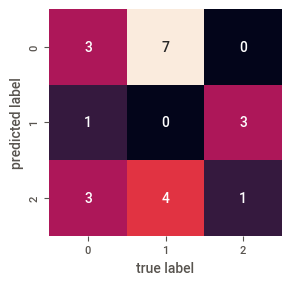

In [50]:
print("Cat Boost Classifier Score are as follows:")
print("=========================================")
CB_accuracy=accuracy_score(y_test,CB_pred) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',CB_accuracy) # printing accuracy score

print("=========================================")
CB_recall=recall_score(y_test,CB_pred,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',CB_recall) # #printing recall score
print("=========================================")

CB_precision=precision_score(y_test,CB_pred,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',CB_precision) # printing precision score
print("=========================================")

CB_f1score=f1_score(y_test,CB_pred,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',CB_f1score) # printing F1_score
print("=========================================")


print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,CB_pred)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,CB_pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,CB_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,CB_pred)

### 8. ExtraTreeClassifier

Extra Tree Classifier Score are as follows:
Accuracy Score :
 0.45454545454545453
Recall Score :
 0.45454545454545453
Precison Score :
 0.474025974025974
F1_Score :
 0.4636363636363636
Classification Report  :
               precision    recall  f1-score   support

           1       0.70      0.70      0.70        10
           2       0.00      0.00      0.00         4
           3       0.43      0.38      0.40         8

    accuracy                           0.45        22
   macro avg       0.38      0.36      0.37        22
weighted avg       0.47      0.45      0.46        22

Confusion Matrix  :


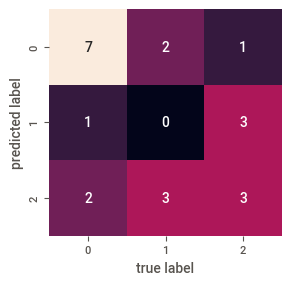

In [51]:
# Extra Tree Classifier for multiclass classification 
ET=ExtraTreeClassifier(random_state=0)

ET.fit(X_train,y_train) #  training model

ET_pred=ET.predict(X_test)# predicting the results

print("Extra Tree Classifier Score are as follows:")
print("=========================================")
ET_accuracy=accuracy_score(y_test,ET_pred) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',ET_accuracy) # printing accuracy score

print("=========================================")
ET_recall=recall_score(y_test,ET_pred,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',ET_recall) # #printing recall score
print("=========================================")

ET_precision=precision_score(y_test,ET_pred,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',ET_precision) # printing precision score
print("=========================================")

ET_f1score=f1_score(y_test,ET_pred,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',ET_f1score) # printing F1_score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,ET_pred)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,ET_pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,ET_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,ET_pred)

### 9. XG Boost Classifier

XG Boost Classifier Score are as follows:
Accuracy Score :
 0.36363636363636365
Recall Score :
 0.36363636363636365
Precison Score :
 0.4656565656565656
F1_Score :
 0.39782439782439777
Classification Report  :
               precision    recall  f1-score   support

           1       0.50      0.40      0.44        10
           2       0.11      0.25      0.15         4
           3       0.60      0.38      0.46         8

    accuracy                           0.36        22
   macro avg       0.40      0.34      0.35        22
weighted avg       0.47      0.36      0.40        22

Confusion Matrix  :


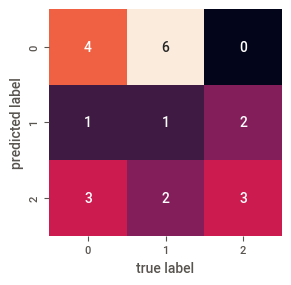

In [52]:
# XGBoost Classifier for multiclass classification

# using Label Encoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)

#Creating object for XGB classifier
XG=XGBClassifier(random_state=42)
XG.fit(X_train,y_train_le) #  training model

y_pred=XG.predict(X_test)# predicting the results
XG_pred = le.inverse_transform(y_pred)

print("XG Boost Classifier Score are as follows:")
print("=========================================")
XG_accuracy=accuracy_score(y_test,XG_pred) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',XG_accuracy) # printing accuracy score

print("=========================================")
XG_recall=recall_score(y_test,XG_pred,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',XG_recall) # #printing recall score
print("=========================================")

XG_precision=precision_score(y_test,XG_pred,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',XG_precision) # printing precision score
print("=========================================")

XG_f1score=f1_score(y_test,XG_pred,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',XG_f1score) # printing F1_score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,XG_pred)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,XG_pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,XG_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,XG_pred)


### 10. HistGradientBoosting Classifier

HistGradient Boosting Classifier Score are as follows:
Accuracy Score :
 0.36363636363636365
Recall Score :
 0.36363636363636365
Precison Score :
 0.5027548209366391
F1_Score :
 0.38273645546372814
Classification Report  :
               precision    recall  f1-score   support

           1       0.50      0.40      0.44        10
           2       0.18      0.50      0.27         4
           3       0.67      0.25      0.36         8

    accuracy                           0.36        22
   macro avg       0.45      0.38      0.36        22
weighted avg       0.50      0.36      0.38        22

Confusion Matrix  :


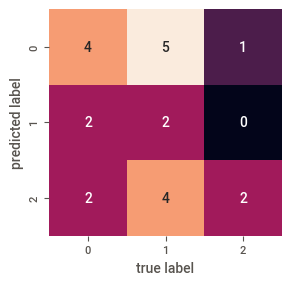

In [53]:
# HistGradient Boosting Classifier for multiclass classification 
HGB=HistGradientBoostingClassifier()

HGB.fit(X_train,y_train) #  training model

HGB_pred=HGB.predict(X_test)# predicting the results

print("HistGradient Boosting Classifier Score are as follows:")
print("=========================================")
HGB_accuracy=accuracy_score(y_test,HGB_pred) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',HGB_accuracy) # printing accuracy score

print("=========================================")
HGB_recall=recall_score(y_test,HGB_pred,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',HGB_recall) # #printing recall score
print("=========================================")

HGB_precision=precision_score(y_test,HGB_pred,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',HGB_precision) # printing precision score
print("=========================================")

HGB_f1score=f1_score(y_test,HGB_pred,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',HGB_f1score) # printing F1_score
print("=========================================")


print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,HGB_pred)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,HGB_pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,HGB_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,HGB_pred)

### 11.Decision Tree Classifier

Decision Tree Classifier Score are as follows:
Accuracy Score :
 0.18181818181818182
Recall Score :
 0.18181818181818182
Precison Score :
 0.2510822510822511
F1_Score :
 0.21084797555385792
Classification Report  :
               precision    recall  f1-score   support

           1       0.29      0.20      0.24        10
           2       0.00      0.00      0.00         4
           3       0.33      0.25      0.29         8

    accuracy                           0.18        22
   macro avg       0.21      0.15      0.17        22
weighted avg       0.25      0.18      0.21        22

Confusion Matrix  :


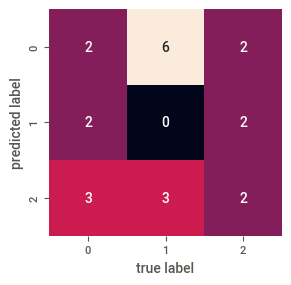

In [54]:
# Decision Tree Classifier for multiclass classification 
DTC=DecisionTreeClassifier()

DTC.fit(X_train,y_train) #  training model

DTC_pred=DTC.predict(X_test)# predicting the results

print("Decision Tree Classifier Score are as follows:")
print("=========================================")
DTC_accuracy=accuracy_score(y_test,DTC_pred) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',DTC_accuracy) # printing accuracy score

print("=========================================")
DTC_recall=recall_score(y_test,DTC_pred,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',DTC_recall) # #printing recall score
print("=========================================")

DTC_precision=precision_score(y_test,DTC_pred,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',DTC_precision) # printing precision score
print("=========================================")

DTC_f1score=f1_score(y_test,DTC_pred,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',DTC_f1score) # printing F1_Score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,DTC_pred)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,DTC_pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,DTC_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,DTC_pred)

### 12. AdaBoost Classifier

AdaBoost Classifier Score are as follows:
Accuracy Score :
 0.4090909090909091
Recall Score :
 0.4090909090909091
Precison Score :
 0.6272727272727273
F1_Score :
 0.4246753246753247
Classification Report  :
               precision    recall  f1-score   support

           1       0.50      0.50      0.50        10
           2       0.20      0.50      0.29         4
           3       1.00      0.25      0.40         8

    accuracy                           0.41        22
   macro avg       0.57      0.42      0.40        22
weighted avg       0.63      0.41      0.42        22

Confusion Matrix  :


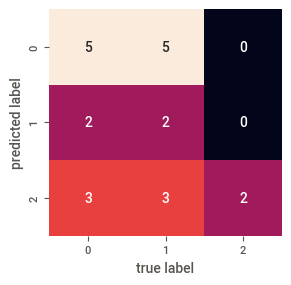

In [55]:
# AdaBoost Classifier for multiclass classification 
ABC=AdaBoostClassifier()

ABC.fit(X_train,y_train) #  training model

ABC_pred=ABC.predict(X_test)# predicting the results

print("AdaBoost Classifier Score are as follows:")
print("=========================================")
ABC_accuracy=accuracy_score(y_test,ABC_pred) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',ABC_accuracy) # printing accuracy score

print("=========================================")
ABC_recall=recall_score(y_test,ABC_pred,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',ABC_recall) # #printing recall score
print("=========================================")

ABC_precision=precision_score(y_test,ABC_pred,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',ABC_precision) # printing precision score
print("=========================================")

ABC_f1score=f1_score(y_test,ABC_pred,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',ABC_f1score) # printing F1_score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,ABC_pred)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,ABC_pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,ABC_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,ABC_pred)

<h3 style='color:green'>As KNeighbours Classifier is giving highest accuracy of 50%  so i m going to check with different value of k </h3>

Text(0, 0.5, 'Error Rate')

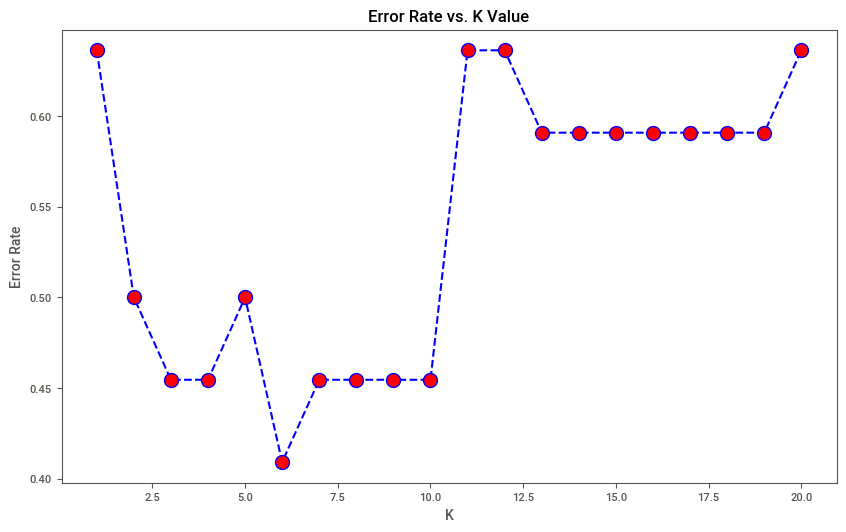

In [56]:
## taking optimal k to determine how many nearest neighbors to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,21),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<b>Now will check specifying n_neighbors' : 6 with less error_rate, what accuracy we are getting</b>

K Neighbors Classifier Score are as follows:
Accuracy Score :
 0.5909090909090909
Recall Score :
 0.5909090909090909
Precison Score :
 0.6237762237762238
F1_Score :
 0.5779534475186648
Classification Report  :
               precision    recall  f1-score   support

           1       0.69      0.90      0.78        10
           2       0.20      0.25      0.22         4
           3       0.75      0.38      0.50         8

    accuracy                           0.59        22
   macro avg       0.55      0.51      0.50        22
weighted avg       0.62      0.59      0.58        22

Confusion Matrix  :


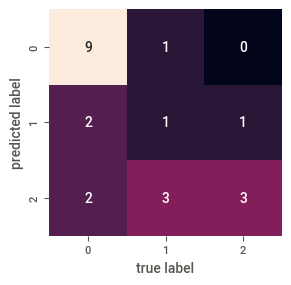

In [57]:
# K Neighbors Classifier for multiclass classification 
KN1=KNeighborsClassifier(n_neighbors=6) # specifiec n_neigbhors=6

KN1.fit(X_train,y_train) #  training model

KN1_pred=KN1.predict(X_test)# predicting the results

print("K Neighbors Classifier Score are as follows:")
print("=========================================")
KN_accuracy1=accuracy_score(y_test,KN1_pred) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',KN_accuracy1) # printing accuracy score

print("=========================================")
KN_recall1=recall_score(y_test,KN1_pred,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',KN_recall1) # #printing recall score
print("=========================================")

KN_precision1=precision_score(y_test,KN1_pred,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',KN_precision1) # printing precision score
print("=========================================")

KN_f1score1=f1_score(y_test,KN1_pred,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',KN_f1score1) # printing F1_Score score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,KN1_pred)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,KN1_pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,KN1_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,KN1_pred)

<h3 style='color:green'>Now we can clearly see that Accuracy got increased from 50% to 59% accuracy.</h3>

### Model Report of All the model 

In [58]:
#created Model_name variable to store all the model name.
model_name=['Logistic Regression','Support Vector Machine','KNeighbours Classifier','GradientBoost Classifier','Mlp Classifier','XG Boost Classifier','ExtraTree Classifier','Cat Boost Classifier','Random Forest Classifier','HistGradientBoostingClassifier','Decision Tree Classifier','AdaBoostClassifier']

#Creating accuracy_report variable to store accuracy of all the model
accuracy_report=[LR_accuracy,SVM_accuracy,KN_accuracy1,GB_accuracy,ML_accuracy,XG_accuracy,ET_accuracy,CB_accuracy,RFC_accuracy,HGB_accuracy,DTC_accuracy,ABC_accuracy]

#Creating recall_report variable to store recall of all the model
recall_report=[LR_recall,SVM_recall,KN_recall1,GB_recall,ML_recall,XG_recall,ET_recall,CB_recall,RFC_recall,HGB_recall,DTC_recall,ABC_recall]

#Creating precision_report variable to store precision of all the model
precision_report=[LR_precision,SVM_precision,KN_precision1,GB_precision,ML_precision,XG_precision,ET_precision,CB_precision,RFC_precision,HGB_precision,DTC_precision,ABC_precision]

#Creating F1_Score_report variable to store F1_Score of all the model
F1_Score_report=[LR_f1score,SVM_f1score,KN_f1score1,GB_f1score,ML_f1score,XG_f1score,ET_f1score,CB_f1score,RFC_f1score,HGB_f1score,DTC_f1score,ABC_f1score]

# Creating model_report dataframe 
model_report = pd.DataFrame([model_name,accuracy_report,recall_report,precision_report,F1_Score_report]).T

#Creating column for model report
model_report.columns = ["Model","Accuracy_Score","Recall_Score","Precision_Score","F1_Score"]

#Sorting value according to Accuracy_score
model_report.sort_values("Accuracy_Score",ascending=False).reset_index(drop=True)

,Model,Accuracy_Score,Recall_Score,Precision_Score,F1_Score
0,KNeighbours Classifier,0.590909,0.590909,0.623776,0.577953
1,Logistic Regression,0.454545,0.454545,0.554408,0.465565
2,Support Vector Machine,0.454545,0.454545,0.616391,0.483747
3,ExtraTree Classifier,0.454545,0.454545,0.474026,0.463636
4,Mlp Classifier,0.409091,0.409091,0.393939,0.40107
5,AdaBoostClassifier,0.409091,0.409091,0.627273,0.424675
6,XG Boost Classifier,0.363636,0.363636,0.465657,0.397824
7,HistGradientBoostingClassifier,0.363636,0.363636,0.502755,0.382736
8,GradientBoost Classifier,0.318182,0.318182,0.431169,0.354234
9,Random Forest Classifier,0.318182,0.318182,0.445455,0.369852


### Hyper Tunning K neighbours Classifier

In [59]:
grid_params = { 'n_neighbors' : [6],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=5, n_jobs = -1)

# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [60]:
# find the best score
g_res.best_score_

0.4104575163398693

In [61]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'uniform'}

In [62]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=6, weights='distance')

In [63]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [64]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.9659090909090909
Test set accuracy:  0.5


K Neighbors Classifier Score are as follows:
Accuracy Score :
 0.5
Recall Score :
 0.5
Precison Score :
 0.5123966942148761
F1_Score :
 0.5021645021645021
Classification Report  :
               precision    recall  f1-score   support

           1       0.73      0.80      0.76        10
           2       0.00      0.00      0.00         4
           3       0.50      0.38      0.43         8

    accuracy                           0.50        22
   macro avg       0.41      0.39      0.40        22
weighted avg       0.51      0.50      0.50        22

Confusion Matrix  :


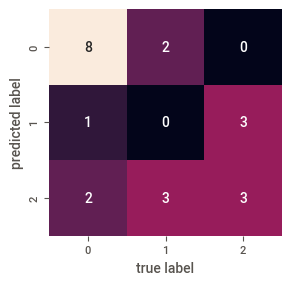

In [65]:
print("K Neighbors Classifier Score are as follows:")
print("=========================================")
KN_accuracy2=accuracy_score(y_test,y_knn) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',KN_accuracy2) # printing accuracy score

print("=========================================")
KN_recall2=recall_score(y_test,y_knn,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',KN_recall2) # #printing recall score
print("=========================================")

KN_precision2=precision_score(y_test,y_knn,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',KN_precision2) # printing precision score
print("=========================================")

KN_f1score2=f1_score(y_test,y_knn,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',KN_f1score2) # printing F1_Score score
print("=========================================")


print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,y_knn)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,y_knn):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,y_knn),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_knn)

### Hyper Tunning Randomized SearchCV by Logistic Regression 

In [66]:
#Defining parameter Range
log_reg_grid = {"C":np.logspace(-4, 4, 20),"solver":["newton-cg"]}

#Logistic Regression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

#Fitting the model
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['newton-cg']},
                   verbose=True)

In [67]:
#Printing parameters
print(rs_log_reg.best_params_)

{'solver': 'newton-cg', 'C': 0.03359818286283781}


In [68]:
#Printing Score
print(rs_log_reg.score(X_test, y_test))

0.45454545454545453


Logistic Regression Score are as follows:
Accuracy Score :
 0.45454545454545453
Recall Score :
 0.45454545454545453
Precison Score :
 0.6125541125541125
F1_Score :
 0.4677929022848808
Classification Report  :
               precision    recall  f1-score   support

           1       0.71      0.50      0.59        10
           2       0.25      0.75      0.38         4
           3       0.67      0.25      0.36         8

    accuracy                           0.45        22
   macro avg       0.54      0.50      0.44        22
weighted avg       0.61      0.45      0.47        22

Confusion Matrix  :


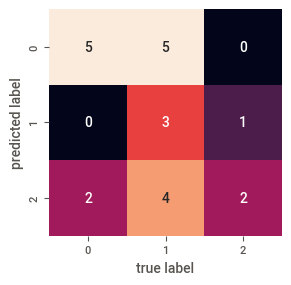

In [69]:
#Making Predict
y_pred_log = rs_log_reg.predict(X_test)

print("Logistic Regression Score are as follows:")
print("=========================================")
LR_accuracy1=accuracy_score(y_test,y_pred_log) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',LR_accuracy1) # printing accuracy score

print("=========================================")
LR_recall1=recall_score(y_test,y_pred_log,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',LR_recall1) # #printing recall score
print("=========================================")

LR_precision1=precision_score(y_test,y_pred_log,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',LR_precision1) # printing precision score
print("=========================================")

LR_f1score1=f1_score(y_test,y_pred_log,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',LR_f1score1) # printing F1_Score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,y_pred_log)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m' )
def plot_conf_mat(y_test,y_pred_log):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred_log),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_pred_log)

### Hyper Tunning Grid SearchCV by Logistic Regression

In [70]:
#Defining parameters
log_reg_grid = {"C":np.logspace(-4, 4, 20),"solver":["newton-cg"]}

#Logistic Regression
np.random.seed(42)
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

#Fitting the model
gs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['newton-cg']},
             verbose=True)

Logistic Regression Score are as follows:
Accuracy Score :
 0.45454545454545453
Recall Score :
 0.45454545454545453
Precison Score :
 0.6125541125541125
F1_Score :
 0.4677929022848808
Classification Report  :
               precision    recall  f1-score   support

           1       0.71      0.50      0.59        10
           2       0.25      0.75      0.38         4
           3       0.67      0.25      0.36         8

    accuracy                           0.45        22
   macro avg       0.54      0.50      0.44        22
weighted avg       0.61      0.45      0.47        22

Confusion Matrix  :


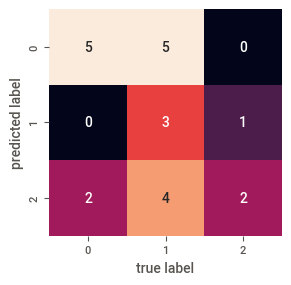

In [71]:
#Making Predict
y_pred_log1 = gs_log_reg.predict(X_test)

print("Logistic Regression Score are as follows:")
print("=========================================")
LR2_accuracy=accuracy_score(y_test,y_pred_log1) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',LR2_accuracy) # printing accuracy score

print("=========================================")
LR2_recall=recall_score(y_test,y_pred_log1,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',LR2_recall) # #printing recall score
print("=========================================")

LR2_precision=precision_score(y_test,y_pred_log1,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',LR2_precision) # printing precision score
print("=========================================")

LR2_f1score=f1_score(y_test,y_pred_log1,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',LR2_f1score) # printing F1_Score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,y_pred_log1)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m' )
def plot_conf_mat(y_test,y_pred_log1):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred_log1),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_pred_log1)

### Hypertunning Support Vector Machine

Support Vector Machine Score are as follows:
Accuracy Score :
 0.45454545454545453
Recall Score :
 0.45454545454545453
Precison Score :
 0.6163911845730027
F1_Score :
 0.48374655647382914
Classification Report  :
               precision    recall  f1-score   support

           1       0.75      0.60      0.67        10
           2       0.18      0.50      0.27         4
           3       0.67      0.25      0.36         8

    accuracy                           0.45        22
   macro avg       0.53      0.45      0.43        22
weighted avg       0.62      0.45      0.48        22

Confusion Matrix  :


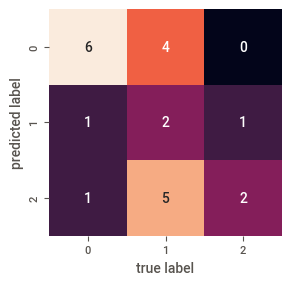

In [72]:
# defining parameter range
param_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}

grid = GridSearchCV(SVC(),param_grid)



# fitting the model for grid search
grid.fit(X_train, y_train)

y_pred_svm=grid.predict(X_test)

print("Support Vector Machine Score are as follows:")
print("=========================================")
SVM_accuracy1=accuracy_score(y_test,y_pred_svm) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',SVM_accuracy1) # printing accuracy score

print("=========================================")
SVM_recall1=recall_score(y_test,y_pred_svm,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',SVM_recall1) # #printing recall score
print("=========================================")

SVM_precision1=precision_score(y_test,y_pred_svm,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',SVM_precision1) # printing precision score
print("=========================================")

SVM_f1score1=f1_score(y_test,y_pred_svm,average='weighted')# checking F1 Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',SVM_f1score1) # printing F1 score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,y_pred_svm)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,y_pred_svm):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred_svm),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_pred_svm)

### Hypertunning Decision Tree Classifier

Decision Tree Classifier Score are as follows:
Accuracy Score :
 0.4090909090909091
Recall Score :
 0.4090909090909091
Precison Score :
 0.43939393939393945
F1 Score :
 0.37424242424242427
Classification Report  :
               precision    recall  f1-score   support

           1       0.50      0.70      0.58        10
           2       0.17      0.25      0.20         4
           3       0.50      0.12      0.20         8

    accuracy                           0.41        22
   macro avg       0.39      0.36      0.33        22
weighted avg       0.44      0.41      0.37        22

Confusion Matrix  :


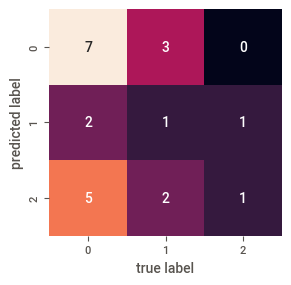

In [73]:
dtree_model = DecisionTreeClassifier(random_state=42,criterion="entropy",max_features= "sqrt",min_samples_leaf=4,min_samples_split= 4)#using the best parameters after tuning
dtree_model.fit(X_train, y_train)

DTC_pred1=dtree_model.predict(X_test)# predicting the results

print("Decision Tree Classifier Score are as follows:")
print("=========================================")
DTC_accuracy1=accuracy_score(y_test,DTC_pred1) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',DTC_accuracy1) # printing accuracy score

print("=========================================")
DTC_recall1=recall_score(y_test,DTC_pred1,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',DTC_recall1) # #printing recall score
print("=========================================")

DTC_precision1=precision_score(y_test,DTC_pred1,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',DTC_precision1) # printing precision score
print("=========================================")

DTC_f1score1=f1_score(y_test,DTC_pred1,average='weighted')# checking F1 score
print('\033[1m' + 'F1 Score :' + '\033[0m' + '\n',DTC_f1score1) # printing F1 score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,DTC_pred1)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,DTC_pred1):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,DTC_pred1),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,DTC_pred1)

### Hypertunning XGB Classifier

XG Boost Classifier Score are as follows:
Accuracy Score :
 0.45454545454545453
Recall Score :
 0.45454545454545453
Precison Score :
 0.5161616161616162
F1 Score :
 0.46767267819899394
Classification Report  :
               precision    recall  f1-score   support

           1       0.56      0.50      0.53        10
           2       0.25      0.50      0.33         4
           3       0.60      0.38      0.46         8

    accuracy                           0.45        22
   macro avg       0.47      0.46      0.44        22
weighted avg       0.52      0.45      0.47        22

Confusion Matrix  :


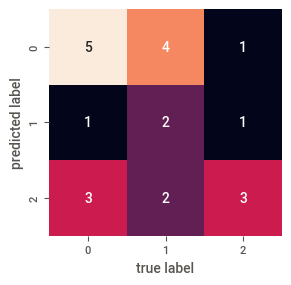

In [74]:
#Trying with xgb with paramater tuning
XG1 = XGBClassifier(learning_rate =0.3,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=2,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softproba',
                    seed=27)#custom tuning of paramters with xgb

XG1.fit(X_train,y_train_le)

y_pred1=XG1.predict(X_test)# predicting the results
XG_pred1 = le.inverse_transform(y_pred1)

print("XG Boost Classifier Score are as follows:")
print("=========================================")
XG_accuracy1=accuracy_score(y_test,XG_pred1) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',XG_accuracy1) # printing accuracy score

print("=========================================")
XG_recall1=recall_score(y_test,XG_pred1,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',XG_recall1) # #printing recall score
print("=========================================")

XG_precision1=precision_score(y_test,XG_pred1,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',XG_precision1) # printing precision score
print("=========================================")

XG_f1score1=f1_score(y_test,XG_pred1,average='weighted')# checking F1 Score
print('\033[1m' + 'F1 Score :' + '\033[0m' + '\n',XG_f1score1) # printing F1 score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,XG_pred1)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,XG_pred1):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,XG_pred1),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,XG_pred1)

### Hypertunning Gradient Boosting Classifier

Gradient Boosting Classifierr Score are as follows:
Accuracy Score :
 0.3181818181818182
Recall Score :
 0.3181818181818182
Precison Score :
 0.43116883116883115
F1 Score :
 0.3542340012928248
Classification Report  :
               precision    recall  f1-score   support

           1       0.43      0.30      0.35        10
           2       0.10      0.25      0.14         4
           3       0.60      0.38      0.46         8

    accuracy                           0.32        22
   macro avg       0.38      0.31      0.32        22
weighted avg       0.43      0.32      0.35        22

Confusion Matrix  :


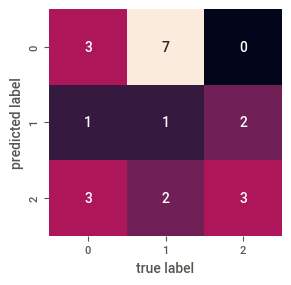

In [75]:
GB1=GradientBoostingClassifier(random_state=42,learning_rate=0.2,n_estimators=200)#custom tuning with gradient boost algorithm

GB1.fit(X_train,y_train) #  training model

GB_pred1=GB.predict(X_test)# predicting the results

print("Gradient Boosting Classifierr Score are as follows:")
print("=========================================")
GB_accuracy1=accuracy_score(y_test,GB_pred1) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',GB_accuracy1) # printing accuracy score

print("=========================================")
GB_recall1=recall_score(y_test,GB_pred1,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',GB_recall1) # #printing recall score
print("=========================================")

GB_precision1=precision_score(y_test,GB_pred1,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',GB_precision1) # printing precision score
print("=========================================")

GB_f1score1=f1_score(y_test,GB_pred1,average='weighted')# checking F1 Score
print('\033[1m' + 'F1 Score :' + '\033[0m' + '\n',GB_f1score1) # printing F1 score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,GB_pred1)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,GB_pred1):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,GB_pred1),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,GB_pred1)

### Hypertunning Random Forest

In [76]:
param_grid1 = {'n_estimators' : [100,200,400,1000],
             'criterion' : ['gini','entropy'], 
             'min_samples_split' : [2,4,8], 
             'min_samples_leaf' : [2,4,6], 
             'max_features' : ['sqrt']}

rf_clf = RandomForestClassifier(n_jobs = -1, random_state = 0)

model1 = RandomizedSearchCV(estimator = rf_clf,
                          param_distributions = param_grid1,
                          scoring = 'accuracy',
                          verbose = 10,
                          n_jobs = 1,
                          cv = StratifiedKFold(2, shuffle = True))

model1.fit(X_train,y_train) 

best_parameters = model1.best_estimator_.get_params()#search for the best parameters
for param_name in sorted(param_grid1.keys()):
    print(f'\t{param_name}: {best_parameters[param_name]}')

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2; 1/10] START criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400
[CV 1/2; 1/10] END criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400;, score=0.318 total time=   0.1s
[CV 2/2; 1/10] START criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400
[CV 2/2; 1/10] END criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400;, score=0.295 total time=   0.2s
[CV 1/2; 2/10] START criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100
[CV 1/2; 2/10] END criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.273 total time=   0.0s
[CV 2/2; 2/10] START criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100
[CV 2/2; 2/10] END criterion=gini, max_features=

Random Forest Classifier Score are as follows:
Accuracy Score :
 0.3181818181818182
Recall Score :
 0.3181818181818182
Precison Score :
 0.5173160173160173
F1 Score :
 0.36886242100145844
Classification Report  :
               precision    recall  f1-score   support

           1       0.57      0.40      0.47        10
           2       0.08      0.25      0.12         4
           3       0.67      0.25      0.36         8

    accuracy                           0.32        22
   macro avg       0.44      0.30      0.32        22
weighted avg       0.52      0.32      0.37        22

Confusion Matrix  :


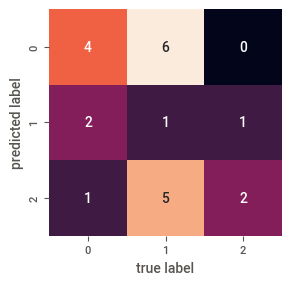

In [77]:
#applying the best parameters
RFC2=RandomForestClassifier(random_state=42,criterion="entropy",max_features= "sqrt",min_samples_leaf=4,
                            min_samples_split= 4,n_estimators= 400)#model creation using best parameters

RFC2.fit(X_train,y_train) #  training model

RFC_pred1=RFC2.predict(X_test)# predicting the results

print("Random Forest Classifier Score are as follows:")
print("=========================================")
RFC_accuracy1=accuracy_score(y_test,RFC_pred1) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',RFC_accuracy1) # printing accuracy score

print("=========================================")
RFC_recall1=recall_score(y_test,RFC_pred1,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',RFC_recall1) # #printing recall score
print("=========================================")

RFC_precision1=precision_score(y_test,RFC_pred1,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',RFC_precision1) # printing precision score
print("=========================================")

RFC_f1score1=f1_score(y_test,RFC_pred1,average='weighted')# checking F1_Score
print('\033[1m' + 'F1 Score :' + '\033[0m' + '\n',RFC_f1score1) # printing F1 score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,RFC_pred1)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,RFC_pred1):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,RFC_pred1),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,RFC_pred1)

### Hypertunning HistGradient Boosting 

Fitting 2 folds for each of 8 candidates, totalling 16 fits
HistGradient Boosting Classifier Score are as follows:
Accuracy Score :
 0.36363636363636365
Recall Score :
 0.36363636363636365
Precison Score :
 0.5181818181818182
F1_Score :
 0.4098124098124098
Classification Report  :
               precision    recall  f1-score   support

           1       0.50      0.40      0.44        10
           2       0.10      0.25      0.14         4
           3       0.75      0.38      0.50         8

    accuracy                           0.36        22
   macro avg       0.45      0.34      0.36        22
weighted avg       0.52      0.36      0.41        22

Confusion Matrix  :


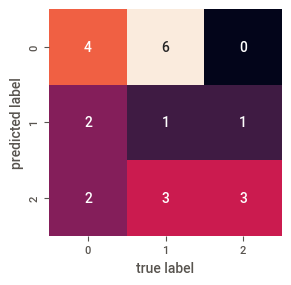

In [78]:
param = {"loss":["categorical_crossentropy","auto"],
         "max_leaf_nodes" :[2,4],
         "min_samples_leaf":[4,6]
}

HGB1 =RandomizedSearchCV(HistGradientBoostingClassifier(), param,cv=2,verbose=1,n_jobs=-1)

HGB1.fit(X_train,y_train) #  training model

HGB_pred1=HGB1.predict(X_test)# predicting the results

print("HistGradient Boosting Classifier Score are as follows:")
print("=========================================")
HGB_accuracy1=accuracy_score(y_test,HGB_pred1) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',HGB_accuracy1) # printing accuracy score

print("=========================================")
HGB_recall1=recall_score(y_test,HGB_pred1,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',HGB_recall1) # #printing recall score
print("=========================================")

HGB_precision1=precision_score(y_test,HGB_pred1,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',HGB_precision1) # printing precision score
print("=========================================")

HGB_f1score1=f1_score(y_test,HGB_pred1,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',HGB_f1score1) # printing F1 score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,HGB_pred1)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,HGB_pred1):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,HGB_pred1),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,HGB_pred1)

### Hypertunning CatBoost

In [79]:
CB1 = CatBoostClassifier(random_state=10,use_best_model=True,iterations=1000,loss_function='MultiClass')
CB1.fit(X_train,y_train,use_best_model=True,verbose=100,eval_set=(X_test,y_test))

Learning rate set to 0.102853
0:	learn: 1.0806562	test: 1.0901105	best: 1.0901105 (0)	total: 702us	remaining: 702ms
100:	learn: 0.5140896	test: 1.1671933	best: 1.0558848 (13)	total: 47.7ms	remaining: 424ms
200:	learn: 0.3385969	test: 1.3275485	best: 1.0558848 (13)	total: 93ms	remaining: 369ms
300:	learn: 0.2574797	test: 1.4413083	best: 1.0558848 (13)	total: 140ms	remaining: 325ms
400:	learn: 0.2130833	test: 1.5254327	best: 1.0558848 (13)	total: 185ms	remaining: 277ms
500:	learn: 0.1841091	test: 1.6001623	best: 1.0558848 (13)	total: 234ms	remaining: 233ms
600:	learn: 0.1644279	test: 1.6636998	best: 1.0558848 (13)	total: 283ms	remaining: 188ms
700:	learn: 0.1497427	test: 1.7147712	best: 1.0558848 (13)	total: 332ms	remaining: 141ms
800:	learn: 0.1392425	test: 1.7574595	best: 1.0558848 (13)	total: 379ms	remaining: 94.2ms
900:	learn: 0.1309556	test: 1.7938559	best: 1.0558848 (13)	total: 436ms	remaining: 47.9ms
999:	learn: 0.1252719	test: 1.8282875	best: 1.0558848 (13)	total: 493ms	remaining

Cat Boost Classifier Score are as follows:
Accuracy Score :
 0.36363636363636365
Recall Score :
 0.36363636363636365
Precison Score :
 0.5430440771349861
F1_Score :
 0.40899908172635446
Classification Report  :
               precision    recall  f1-score   support

           1       0.62      0.50      0.56        10
           2       0.09      0.25      0.13         4
           3       0.67      0.25      0.36         8

    accuracy                           0.36        22
   macro avg       0.46      0.33      0.35        22
weighted avg       0.54      0.36      0.41        22

Confusion Matrix  :


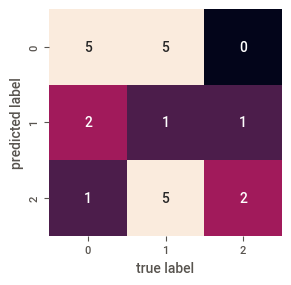

In [80]:
CB_pred1=CB1.predict(X_test)

print("Cat Boost Classifier Score are as follows:")
print("=========================================")
CB_accuracy1=accuracy_score(y_test,CB_pred1) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',CB_accuracy1) # printing accuracy score

print("=========================================")
CB_recall1=recall_score(y_test,CB_pred1,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',CB_recall1) # #printing recall score
print("=========================================")

CB_precision1=precision_score(y_test,CB_pred1,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',CB_precision1) # printing precision score
print("=========================================")

CB_f1score1=f1_score(y_test,CB_pred1,average='weighted')# checking precision
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',CB_f1score1) # printing precision score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,CB_pred1)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,CB_pred1):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,CB_pred1),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,CB_pred1)

### Hypertunning ExtraTree Classifier

Extra Tree Classifier Score are as follows:
Accuracy Score :
 0.45454545454545453
Recall Score :
 0.45454545454545453
Precison Score :
 0.474025974025974
F1_Score :
 0.4636363636363636
Classification Report  :
               precision    recall  f1-score   support

           1       0.70      0.70      0.70        10
           2       0.00      0.00      0.00         4
           3       0.43      0.38      0.40         8

    accuracy                           0.45        22
   macro avg       0.38      0.36      0.37        22
weighted avg       0.47      0.45      0.46        22

Confusion Matrix  :


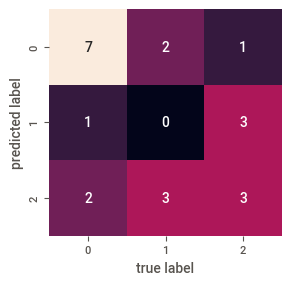

In [81]:
ET1=ExtraTreeClassifier(random_state=0,criterion="entropy",max_features= "sqrt",min_samples_leaf=4,min_samples_split= 4)

ET1.fit(X_train,y_train) #  training model

ET_pred1=ET.predict(X_test)# predicting the results

print("Extra Tree Classifier Score are as follows:")
print("=========================================")
ET_accuracy1=accuracy_score(y_test,ET_pred1) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',ET_accuracy1) # printing accuracy score

print("=========================================")
ET_recall1=recall_score(y_test,ET_pred1,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',ET_recall1) # #printing recall score
print("=========================================")

ET_precision1=precision_score(y_test,ET_pred1,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',ET_precision1) # printing precision score
print("=========================================")

ET_f1score1=f1_score(y_test,ET_pred1,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',ET_f1score1) # printing F1 score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,ET_pred1)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,ET_pred1):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,ET_pred1),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,ET_pred1)

### Hypertunning AdaBoost Classifier

AdaBoost Classifier Score are as follows:
Accuracy Score :
 0.5
Recall Score :
 0.5
Precison Score :
 0.7162534435261708
F1_Score :
 0.5052631578947367
Classification Report  :
               precision    recall  f1-score   support

           1       0.67      0.60      0.63        10
           2       0.27      0.75      0.40         4
           3       1.00      0.25      0.40         8

    accuracy                           0.50        22
   macro avg       0.65      0.53      0.48        22
weighted avg       0.72      0.50      0.51        22

Confusion Matrix  :


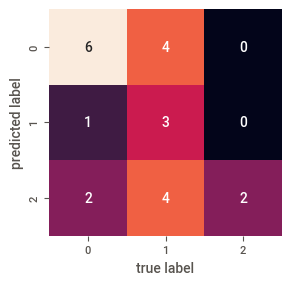

In [82]:
param_grid = { 'n_estimators': [100,200,300]}

ABC1 = GridSearchCV(AdaBoostClassifier(),param_grid,scoring='accuracy',cv=3,n_jobs=-1)


ABC1.fit(X_train,y_train) #  training model

ABC_pred1=ABC1.predict(X_test)# predicting the results

print("AdaBoost Classifier Score are as follows:")
print("=========================================")
ABC_accuracy1=accuracy_score(y_test,ABC_pred1) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',ABC_accuracy1) # printing accuracy score

print("=========================================")
ABC_recall1=recall_score(y_test,ABC_pred1,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',ABC_recall1) # #printing recall score
print("=========================================")

ABC_precision1=precision_score(y_test,ABC_pred1,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',ABC_precision1) # printing precision score
print("=========================================")

ABC_f1score1=f1_score(y_test,ABC_pred1,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',ABC_f1score1) # printing F1_Score
print("=========================================")


print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,ABC_pred1)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,ABC_pred1):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,ABC_pred1),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,ABC_pred1)

### Hypertunning MLP Classifier

MLP Classifier Score are as follows:
Accuracy Score :
 0.4090909090909091
Recall Score :
 0.4090909090909091
Precison Score :
 0.3939393939393939
F1_Score :
 0.4010695187165776
Classification Report  :
               precision    recall  f1-score   support

           1       0.60      0.60      0.60        10
           2       0.00      0.00      0.00         4
           3       0.33      0.38      0.35         8

    accuracy                           0.41        22
   macro avg       0.31      0.33      0.32        22
weighted avg       0.39      0.41      0.40        22

Confusion Matrix  :


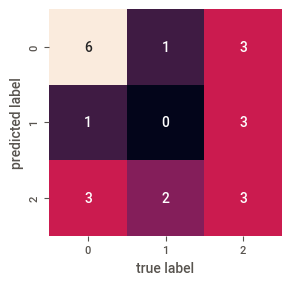

In [83]:
# MLP Classifier for multiclass classification 
mlp=MLPClassifier(hidden_layer_sizes=(50,3),learning_rate_init=0.1,max_iter=100,random_state=42)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

ML1 = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)

ML1.fit(X_train,y_train) #  training model

ML_pred1=ML.predict(X_test)# predicting the results

print("MLP Classifier Score are as follows:")
print("=========================================")
ML_accuracy1=accuracy_score(y_test,ML_pred1) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',ML_accuracy1) # printing accuracy score

print("=========================================")
ML_recall1=recall_score(y_test,ML_pred1,average='weighted') #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',ML_recall1) # #printing recall score
print("=========================================")

ML_precision1=precision_score(y_test,ML_pred1,average='weighted')# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',ML_precision1) # printing precision score
print("=========================================")

ML_f1score1=f1_score(y_test,ML_pred1,average='weighted')# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',ML_f1score1) # printing F1_score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,ML_pred1)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,ML_pred1):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,ML_pred1),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,ML_pred1)

### Model Report of All the model After Hyertunning

In [84]:
model_name=['Logistic Regression','Support Vector Machine','KNeighbours Classifier','GradientBoost Classifier','Mlp Classifier','XG Boost Classifier','ExtraTree Classifier','Cat Boost Classifier','Random Forest Classifier','HistGradientBoostingClassifier','Decision Tree Classifier','AdaBoostClassifier']

accuracy_report1=[LR_accuracy1,SVM_accuracy1,KN_accuracy2,GB_accuracy1,ML_accuracy1,XG_accuracy1,ET_accuracy1,CB_accuracy1,RFC_accuracy1,HGB_accuracy1,DTC_accuracy1,ABC_accuracy1]

recall_report1=[LR_recall1,SVM_recall1,KN_recall2,GB_recall1,ML_recall1,XG_recall1,ET_recall1,CB_recall1,RFC_recall1,HGB_recall1,DTC_recall1,ABC_recall1]

precision_report1=[LR_precision1,SVM_precision1,KN_precision2,GB_precision1,ML_precision1,XG_precision1,ET_precision1,CB_precision1,RFC_precision1,HGB_precision1,DTC_precision1,ABC_precision1]


f1score_report1=[LR_f1score1,SVM_f1score1,KN_f1score2,GB_f1score1,ML_f1score1,XG_f1score1,ET_f1score1,CB_f1score1,RFC_f1score1,HGB_f1score1,DTC_f1score1,ABC_f1score1]

model_report1 = pd.DataFrame([model_name,accuracy_report1,recall_report1,precision_report1,f1score_report1]).T
model_report1.columns = ["Model","Accuracy_Score","Recall_Score","Precision_Score","F1_Score"]

model_report1.sort_values("Accuracy_Score",ascending=False).reset_index(drop=True)

,Model,Accuracy_Score,Recall_Score,Precision_Score,F1_Score
0,KNeighbours Classifier,0.5,0.5,0.512397,0.502165
1,AdaBoostClassifier,0.5,0.5,0.716253,0.505263
2,Logistic Regression,0.454545,0.454545,0.612554,0.467793
3,Support Vector Machine,0.454545,0.454545,0.616391,0.483747
4,XG Boost Classifier,0.454545,0.454545,0.516162,0.467673
5,ExtraTree Classifier,0.454545,0.454545,0.474026,0.463636
6,Mlp Classifier,0.409091,0.409091,0.393939,0.40107
7,Decision Tree Classifier,0.409091,0.409091,0.439394,0.374242
8,Cat Boost Classifier,0.363636,0.363636,0.543044,0.408999
9,HistGradientBoostingClassifier,0.363636,0.363636,0.518182,0.409812


### Comparsion of the model before hypertune and after hyper tune

In [85]:
final_report=pd.DataFrame([model_name,accuracy_report,accuracy_report1,recall_report,recall_report1,precision_report,precision_report1,F1_Score_report,f1score_report1]).T
final_report.columns = ["Model","Accuracy_Score","Accuracy_Score After Hypertunning","Recall_Score","Recall_Score After Hypertunning","Precision_Score","Precision_Score After Hypertunning","F1_Score","F1_Score After Hypertunning"]

final_report.sort_values("Accuracy_Score",ascending=False).reset_index(drop=True)

,Model,Accuracy_Score,Accuracy_Score After Hypertunning,Recall_Score,Recall_Score After Hypertunning,Precision_Score,Precision_Score After Hypertunning,F1_Score,F1_Score After Hypertunning
0,KNeighbours Classifier,0.590909,0.5,0.590909,0.5,0.623776,0.512397,0.577953,0.502165
1,Logistic Regression,0.454545,0.454545,0.454545,0.454545,0.554408,0.612554,0.465565,0.467793
2,Support Vector Machine,0.454545,0.454545,0.454545,0.454545,0.616391,0.616391,0.483747,0.483747
3,ExtraTree Classifier,0.454545,0.454545,0.454545,0.454545,0.474026,0.474026,0.463636,0.463636
4,Mlp Classifier,0.409091,0.409091,0.409091,0.409091,0.393939,0.393939,0.40107,0.40107
5,AdaBoostClassifier,0.409091,0.5,0.409091,0.5,0.627273,0.716253,0.424675,0.505263
6,XG Boost Classifier,0.363636,0.454545,0.363636,0.454545,0.465657,0.516162,0.397824,0.467673
7,HistGradientBoostingClassifier,0.363636,0.363636,0.363636,0.363636,0.502755,0.518182,0.382736,0.409812
8,GradientBoost Classifier,0.318182,0.318182,0.318182,0.318182,0.431169,0.431169,0.354234,0.354234
9,Random Forest Classifier,0.318182,0.318182,0.318182,0.318182,0.445455,0.517316,0.369852,0.368862


## <span style="color:green">Instantiate best model KNeighbours Classifier with 59% accuracy, 59% Recall Score,62% Precision Score,57% F1 Score.</span>

### Additional Information For  Top Best Model ROC_AUC Score.

### Calculating roc_auc score in two ways:
- OVR (one vs rest)
- OVO (one vs one)

In [86]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr


In [87]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [88]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

### ROC Curve - One vs Rest (OvR)
#### Compares each class with the rest of the classes

In [89]:
classes=KN1.classes_
classes

array([1, 2, 3], dtype=int64)

In [90]:
y_score=KN1.predict_proba(X_test)
y_score

array([[0.66666667, 0.33333333, 0.        ],
       [0.16666667, 0.5       , 0.33333333],
       [0.33333333, 0.5       , 0.16666667],
       [0.16666667, 0.33333333, 0.5       ],
       [0.        , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.        ],
       [0.66666667, 0.        , 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.5       , 0.        , 0.5       ],
       [0.5       , 0.33333333, 0.16666667],
       [0.66666667, 0.16666667, 0.16666667],
       [0.66666667, 0.33333333, 0.        ],
       [0.16666667, 0.16666667, 0.66666667],
       [0.66666667, 0.33333333, 0.        ],
       [0.        , 0.16666667, 0.83333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.5       , 0.5       , 0.        ],
       [0.5       , 0.16666667, 0.33333333],
       [0.5       , 0.33333333, 0.16666667],
       [0.16666667, 0.5       , 0.33333333],
       [0.33333333, 0.16666667, 0.5       ],
       [0.16666667, 0.66666667, 0.16666667]])

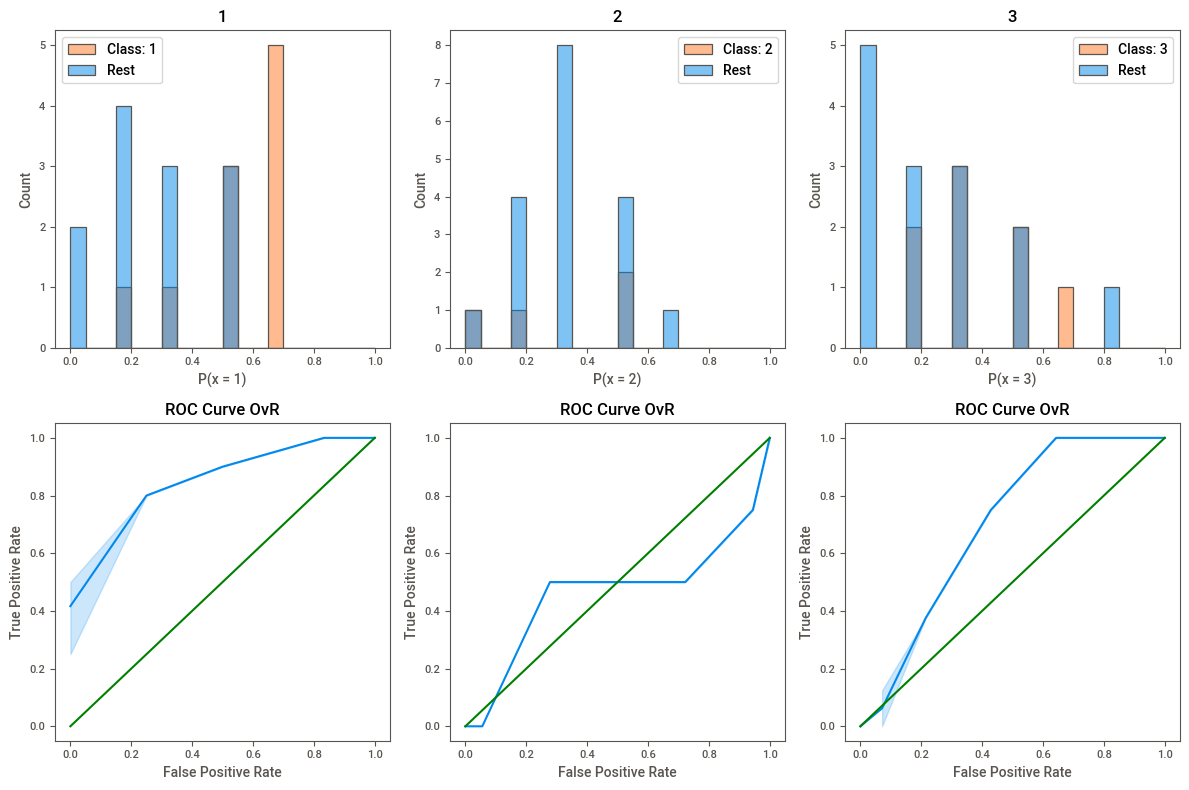

In [91]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux =X_test_copy.copy()
    df_aux['class'] =[1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_score[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [92]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

1 ROC AUC OvR: 0.8583
2 ROC AUC OvR: 0.4653
3 ROC AUC OvR: 0.7009
average ROC AUC OvR: 0.6748


In [93]:
score1=roc_auc_score(y_test, y_score, labels = classes, multi_class = 'ovr', average = 'macro')
print(score1)

0.6748346560846561


### ROC Curve - One vs One (OvO)
#### Compares each possible combination of the classes, two at a time

In [94]:
classes_combinations1 = []
class_list1 = list(classes)
for i in range(len(class_list1)):
    for j in range(i+1, len(class_list1)):
        classes_combinations1.append([class_list1[i], class_list1[j]])
        classes_combinations1.append([class_list1[j], class_list1[i]])
classes_combinations1


[[1, 2], [2, 1], [1, 3], [3, 1], [2, 3], [3, 2]]

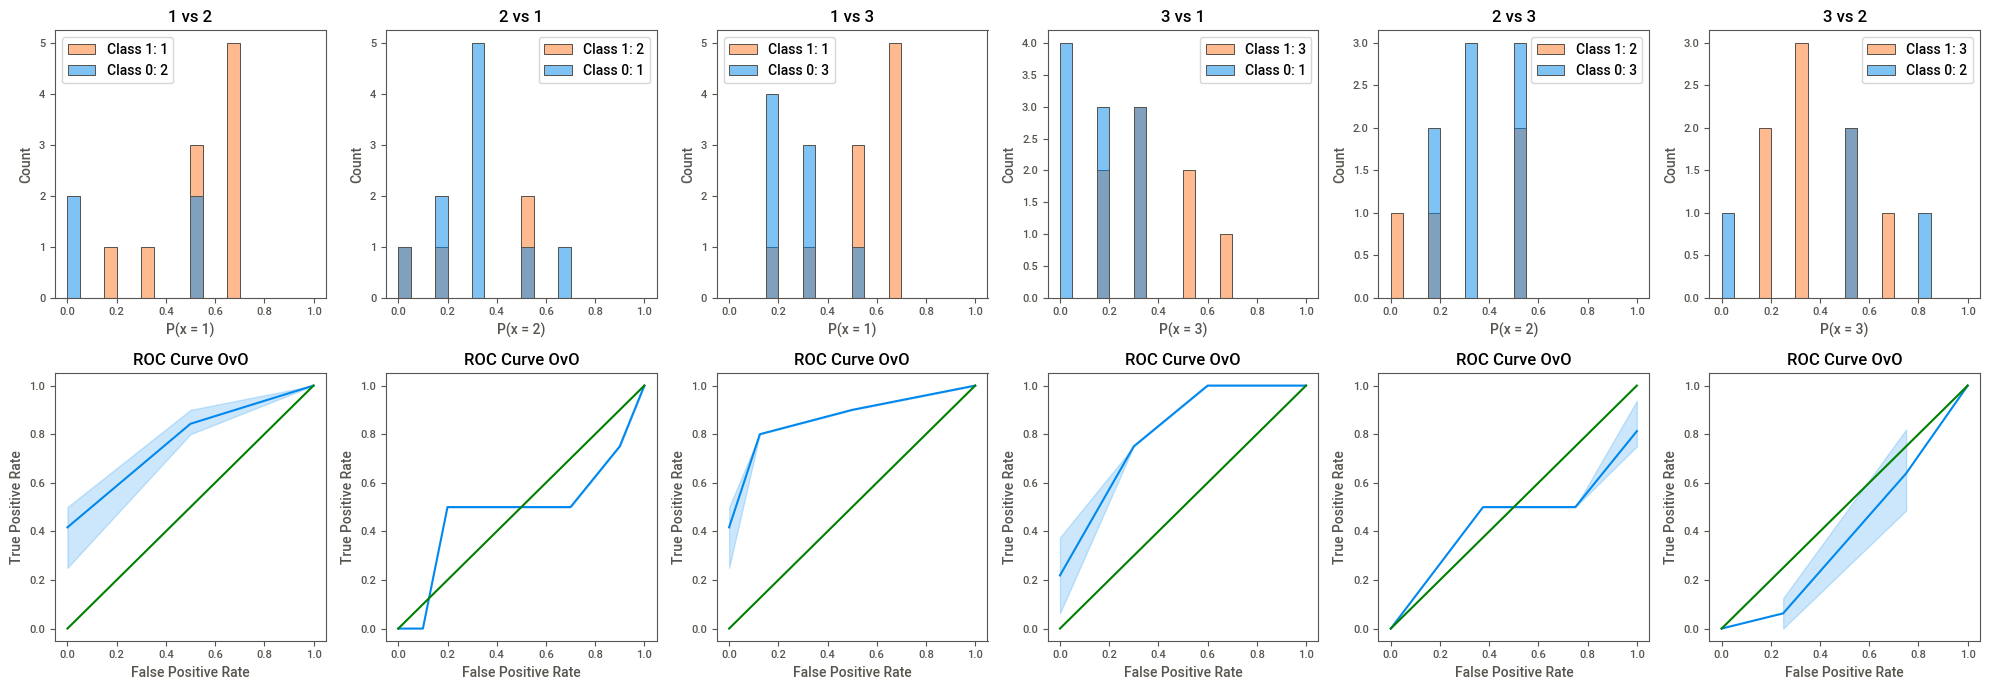

In [95]:
# Plots the Probability Distributions and the ROC Curves One vs ONe
plt.figure(figsize = (20, 7))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovo1 = {}
#print(classes_combinations[0][1])
for i in range(len(classes_combinations1)):
    # Gets the class
    comb = classes_combinations1[i]
    c1 = comb[0]
    c2 = comb[1]
    c1_index = class_list1.index(c1)
    title = str(c1)+" vs "+str(c2)
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test_copy.copy()
    df_aux['class'] = y_test
    df_aux['prob'] = y_score[:, c1_index]
    
    # Slices only the subset with both classes
    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
    df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 6, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(title)
    ax.legend([f"Class 1: {c1}", f"Class 0: {c2}"])
    ax.set_xlabel(f"P(x = {c1})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 6, i+7)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvO")
    
    # Calculates the ROC AUC OvO
    roc_auc_ovo1[title] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [96]:
# Displays the ROC AUC for each class
avg_roc_auc1 = 0
i = 0
for k in roc_auc_ovo1:
    avg_roc_auc1 += roc_auc_ovo1[k]
    i += 1
    print(f"{k} ROC AUC OvO: {roc_auc_ovo1[k]:.4f}")
print(f"average ROC AUC OvO: {avg_roc_auc1/i:.4f}")

1 vs 2 ROC AUC OvO: 0.8250
2 vs 1 ROC AUC OvO: 0.4875
1 vs 3 ROC AUC OvO: 0.8750
3 vs 1 ROC AUC OvO: 0.8313
2 vs 3 ROC AUC OvO: 0.4375
3 vs 2 ROC AUC OvO: 0.3750
average ROC AUC OvO: 0.6385


In [97]:
score2=roc_auc_score(y_test, y_score, labels = classes, multi_class = 'ovo', average = 'macro')
print(score2)

0.6385416666666667


<h4 style="color:green"> ROC_AUC SCORE of the K-Neighbours CLassfier <br>  </h4>
- ONE VS REST (OVR) :<b> 67% </b> <br>
- ONE VS ONE (OVO) : <b> 64% </b>

### Performance Report of best Model (K-neighbours Classifier)

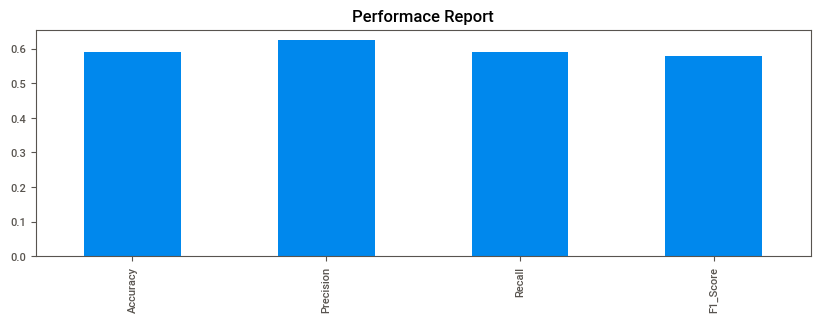

In [98]:
#Printing bar plot for best Model
cv_metrics = pd.DataFrame({"Accuracy": KN_accuracy1,"Precision" :KN_precision1,"Recall" : KN_recall1,"F1_Score":KN_f1score1},index=[0])
cv_metrics.T.plot.bar(title="Performace Report", legend=False);

### Printing final Matrix of Best Model

In [99]:
# Printing KNeighbour CLassifier Model Matrix
model_report.loc[2]

Model              KNeighbours Classifier
Accuracy_Score                   0.590909
Recall_Score                     0.590909
Precision_Score                  0.623776
F1_Score                         0.577953
Name: 2, dtype: object

## Conclusion

<h2 style="color:green"> K-neighbours Classifier Model is the best model with 59% accuracy score to predict Teacher  in a given dataset. </h2>

####  <span style="color:red"> Here are some of the key outcomes of the project:
 
- The given dataset was very small totally around 151 samples with 6 column with no header including one targe variable and after data preprocessing found 41 duplicate data that is removed .
- After removing duplicacy from the dataset only 110 dataset left for modelling the data.
- Visualizing the distribution of data and thier relationships,helped us to get some insights on the relationship between the featureset.
- Feature Selection/Eliminination was carried out and appropriate feature were shortlisted.    
- The samples were not imbalanced as it was a multiclass classification problem ,target variable is almost equally distributed among three attribute in 2:1:1 ratio. So neeend to go with SMOte technique.   
- Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
-The Supervied Learning algorithms (k-Nearest Neighbors) perform the best on the current dataset.
    
  

####  <span style="color:red"> Challenges that I faced in this project: </span>

- To figure out, Business case belongs to which type of prblem ,like regression or classification, or time series etc.
- As data was small, to do preprocessing,it takes too much time, as data is having duplicac i.e whether duplicay should be remove or not.
- Figuring out what assumptions can be safely made about the data and the underlying system.
- Choosing best model for this project.